In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from random import random 

%matplotlib inline 

### Census Data

In [2]:
# Read census zip code csv's into a dictionary
census_zipdata_dict = dict()
census_yrs = list(range(2014,2019))
for yr in census_yrs:
    census_zipdata_dict[yr] = pd.read_csv('./data/zip_codes_'+str(yr)+'_5yr.csv')
    census_zipdata_dict[yr]['year'] = yr
    census_zipdata_dict[yr] = census_zipdata_dict[yr].iloc[:,[0,census_zipdata_dict[yr].shape[1]-1]+
                                                           list(range(1,census_zipdata_dict[yr].shape[1]-1))]
# Remove features not in all datasets for 2018 dataset
census_zipdata_dict[2018] = census_zipdata_dict[2018].iloc[:, 
            census_zipdata_dict[2018].columns.isin(census_zipdata_dict[2015].columns)]
# Make all census datasets have the same features in the same order
census_zipdata_dict = {yr:census_zipdata_dict[yr][census_zipdata_dict[2018].columns] for (yr,data) in census_zipdata_dict.items()}

In [3]:
census_zipdata_2014_18 = pd.concat(census_zipdata_dict)
# type(census_zipdata_2014_18['geo_id'].iloc[0])
np.sum([len(str_)<5 for str_ in census_zipdata_2014_18['geo_id'].astype(str)])

12790

In [4]:
census_zipdata_2014_18['geo_id'] = [str_ if len(str_)==5 else '0'+str_ if len(str_)==4 else '00'+str_ 
     for str_ in census_zipdata_2014_18['geo_id'].astype(str)]

# np.sum([len(str_)<5 for str_ in census_zipdata_2014_18['geo_id'].astype(str)])

census_zipdata_2014_18

geo_id  year     do_date  total_pop  households  male_pop  \
2014 0      20899  2014    20102014        131         131        84   
     1      70803  2014    20102014       1010         102       657   
     2      40041  2014    20102014        277         142        56   
     3      95646  2014    20102014         98          23        50   
     4      61112  2014    20102014        100         100        29   
...           ...   ...         ...        ...         ...       ...   
2018 33115  35463  2018  2014-01-01       1794         704       904   
     33116  77664  2018  2014-01-01       2667         934      1300   
     33117  21822  2018  2014-01-01       2013         776      1070   
     33118  07418  2018  2014-01-01       2304         766      1281   
     33119  03036  2018  2014-01-01       5039        1683      2573   

            female_pop  median_age  male_under_5  male_5_to_9  ...  \
2014 0              47        58.1             0            0  ...   
     1             353        19.5             0            0  ...   
     2             221        81.2             0            0  ...   
     3              48        25.2             0            0  ...   
     4              71        89.5             0            0  ...   
...                ...         ...           ...          ...  ...   
2018 33115         890        42.6            84           46  ...   
     33116        1367        45.6            29           54  ...   
     33117         943        36.8            34           59  ...   
     33118        1023        40.8            56           27  ...   
     33119        2466        42.8            94          223  ...   

            management_business_sci_arts_employed  sales_office_employed  \
2014 0                                        9.0                   34.0   
     1                                      172.0                   85.0   
     2                                       11.0                   11.0   
     3                                       27.0                   22.0   
     4                                        9.0                    0.0   
...                                           ...                    ...   
2018 33115                                  216.0                  217.0   
     33116                                  201.0                  212.0   
     33117                                  427.0                  106.0   
     33118                                  559.0                  336.0   
     33119                                 1426.0                  656.0   

            in_grades_1_to_4  in_grades_5_to_8  in_grades_9_to_12  in_school  \
2014 0                     0                 0                  0          0   
     1                     0                 0                  0        996   
     2                     0                 0                  0          0   
     3                     0                 0                  0         29   
     4                     0                 0                  0          0   
...                      ...               ...                ...        ...   
2018 33115               134                50                113        389   
     33116                38               286                125        647   
     33117                83               198                 40        645   
     33118                81                93                292        711   
     33119               327               291                202       1298   

            in_undergrad_college  speak_only_english_at_home  \
2014 0                         0                        32.0   
     1                       982                       955.0   
     2                         0                       277.0   
     3                        29                        77.0   
     4                         0                       100.0   
...                          ...               

### ZORI Data

In [5]:
zori = pd.read_csv('./ZORI_CLEAN.csv')
# zori_2014_18 = zori.iloc[:,:64]
zori

,RegionName,Yr_Mo,RI,Year,Month
0,1604,2014-01,1030.0,2014,1
1,1604,2014-02,1034.0,2014,2
2,1604,2014-03,1039.0,2014,3
3,1604,2014-04,1043.0,2014,4
4,1604,2014-05,1048.0,2014,5
...,...,...,...,...,...
156865,99207,2021-02,1396.0,2021,2
156866,99207,2021-03,1403.0,2021,3
156867,99207,2021-04,1410.0,2021,4
156868,99207,2021-05,1417.0,2021,5


In [6]:
# # Pivot Longer Rent Prices by year-month
# zori_to_agg = pd.melt(zori, id_vars=zori.columns[:4], value_vars=zori.columns[4:])

# # Get Avg Rent Prices per year to create ZORI by year
# zori_to_agg = zori_to_agg.rename(columns={'value':'rent_price'})
# zori_to_agg['year'] = zori_to_agg['variable'].str[:4].astype(int)
# zori_to_agg['month'] = zori_to_agg['variable'].str[5:].astype(int)
# zori_to_add = zori_to_agg.groupby(['RegionName', 'year']).agg({'rent_price':'mean'})

# zori_1_2014_6_21 = zori_to_agg[['RegionName', 'MsaName', 'year']].merge(
#     zori_to_add, how='outer', on=['RegionName', 'year']).drop_duplicates().reset_index(drop=True)

zori_1_2014_6_21 = zori.copy()

np.sum([len(str_)<5 for str_ in zori_1_2014_6_21['RegionName'].astype(str)])

7560

In [7]:
zori_1_2014_6_21['RegionName'] = [str_ if len(str_)==5 else '0'+str_ if len(str_)==4 else '00'+str_ 
     for str_ in zori_1_2014_6_21['RegionName'].astype(str)]

np.sum([len(str_)<5 for str_ in zori_1_2014_6_21['RegionName'].astype(str)])

zori_1_2014_6_21 = zori_1_2014_6_21.drop(columns='Yr_Mo').rename(columns={'RI':'rent_price', 'Year':'year', 'Month':'month'})[['RegionName','year','month','rent_price']]

In [8]:
zori_to_add = zori_1_2014_6_21.groupby(['RegionName', 'year']).agg({'rent_price':'mean'})
zori_1_2014_6_21 = zori_1_2014_6_21[['RegionName','year']].merge(
    zori_to_add, how='outer', on=['RegionName', 'year']).drop_duplicates().reset_index(drop=True)
zori_1_2014_6_21

,RegionName,year,rent_price
0,01604,2014,1054.833333
1,01604,2015,1119.416667
2,01604,2016,1185.000000
3,01604,2017,1247.500000
4,01604,2018,1321.833333
...,...,...,...
13939,99207,2017,1121.250000
13940,99207,2018,1174.500000
13941,99207,2019,1268.333333
13942,99207,2020,1335.458333


### Combine and Analyze

In [9]:
zori_census_2014_18 = zori_1_2014_6_21[zori_1_2014_6_21['year']<2019].merge(census_zipdata_2014_18, how='inner', left_on=['RegionName', 'year'], right_on=['geo_id', 'year'])

zori_census_2014_18.shape[0]

8700

In [10]:
for i in range(zori_census_2014_18.shape[1]):
    print(f'{zori_census_2014_18.columns[i]} : \t\t{np.sum(zori_census_2014_18.isna())[i]}')

RegionName : 		0
year : 		0
rent_price : 		0
geo_id : 		0
do_date : 		0
total_pop : 		0
households : 		0
male_pop : 		0
female_pop : 		0
median_age : 		0
male_under_5 : 		0
male_5_to_9 : 		0
male_10_to_14 : 		0
male_15_to_17 : 		0
male_18_to_19 : 		0
male_20 : 		0
male_21 : 		0
male_22_to_24 : 		0
male_25_to_29 : 		0
male_30_to_34 : 		0
male_35_to_39 : 		0
male_40_to_44 : 		0
male_45_to_49 : 		0
male_50_to_54 : 		0
male_55_to_59 : 		0
male_65_to_66 : 		0
male_67_to_69 : 		0
male_70_to_74 : 		0
male_75_to_79 : 		0
male_80_to_84 : 		0
male_85_and_over : 		0
female_under_5 : 		0
female_5_to_9 : 		0
female_10_to_14 : 		0
female_15_to_17 : 		0
female_18_to_19 : 		0
female_20 : 		0
female_21 : 		0
female_22_to_24 : 		0
female_25_to_29 : 		0
female_30_to_34 : 		0
female_35_to_39 : 		0
female_40_to_44 : 		0
female_45_to_49 : 		0
female_50_to_54 : 		0
female_55_to_59 : 		0
female_60_to_61 : 		0
female_62_to_64 : 		0
female_65_to_66 : 		0
female_67_to_69 : 		0
female_70_to_74 : 		0
female_75_to_

Text(0.5, 1.0, 'pop_5_years_over')

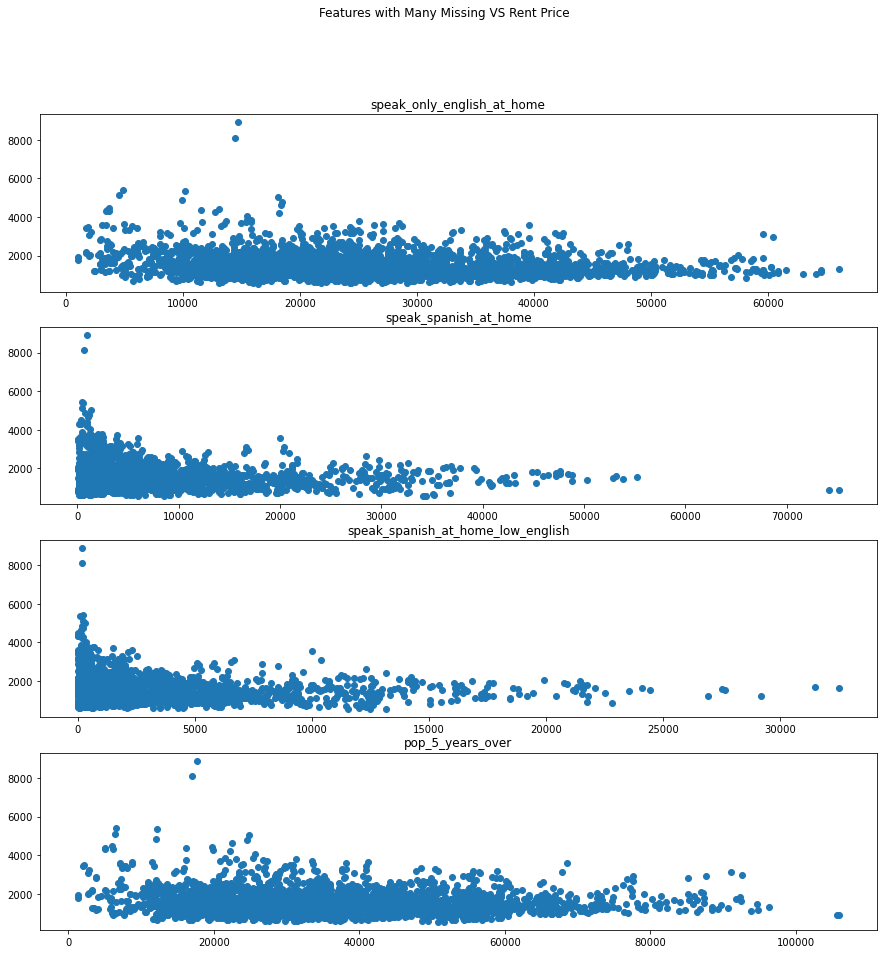

In [11]:
# Make scatter plot of features with many missing values vs the rent price to see slopes

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
fig.suptitle('Features with Many Missing VS Rent Price')
fig.set_figheight(15)
fig.set_figwidth(15)
ax1.scatter(zori_census_2014_18['speak_only_english_at_home'], zori_census_2014_18['rent_price'])
ax1.set_title('speak_only_english_at_home')
ax2.scatter(zori_census_2014_18['speak_spanish_at_home'], zori_census_2014_18['rent_price'])
ax2.set_title('speak_spanish_at_home')
ax3.scatter(zori_census_2014_18['speak_spanish_at_home_low_english'], zori_census_2014_18['rent_price'])
ax3.set_title('speak_spanish_at_home_low_english')
ax4.scatter(zori_census_2014_18['pop_5_years_over'], zori_census_2014_18['rent_price'])
ax4.set_title('pop_5_years_over')

In [12]:
zori_census_2014_18[['RegionName', 'year', 'rent_price']][zori_census_2014_18['rent_price']>25000]

,RegionName,year,rent_price


In [13]:
# zori_census_2014_18 = zori_census_2014_18[zori_census_2014_18['RegionName']!=11937]

In [14]:
# Shows little to no correlation with rent price, remove features
zori_census_2014_18 = zori_census_2014_18.drop(['speak_only_english_at_home', 'speak_spanish_at_home', 'speak_spanish_at_home_low_english', 'pop_5_years_over'], axis=1)

census_zipdata_2014_18 = census_zipdata_2014_18.drop(['speak_only_english_at_home', 'speak_spanish_at_home', 'speak_spanish_at_home_low_english', 'pop_5_years_over'], axis=1)

In [15]:
for i in range(zori_census_2014_18.shape[1]):
    print(f'{zori_census_2014_18.columns[i]} : \t\t{np.sum(zori_census_2014_18.isna())[i]}')

RegionName : 		0
year : 		0
rent_price : 		0
geo_id : 		0
do_date : 		0
total_pop : 		0
households : 		0
male_pop : 		0
female_pop : 		0
median_age : 		0
male_under_5 : 		0
male_5_to_9 : 		0
male_10_to_14 : 		0
male_15_to_17 : 		0
male_18_to_19 : 		0
male_20 : 		0
male_21 : 		0
male_22_to_24 : 		0
male_25_to_29 : 		0
male_30_to_34 : 		0
male_35_to_39 : 		0
male_40_to_44 : 		0
male_45_to_49 : 		0
male_50_to_54 : 		0
male_55_to_59 : 		0
male_65_to_66 : 		0
male_67_to_69 : 		0
male_70_to_74 : 		0
male_75_to_79 : 		0
male_80_to_84 : 		0
male_85_and_over : 		0
female_under_5 : 		0
female_5_to_9 : 		0
female_10_to_14 : 		0
female_15_to_17 : 		0
female_18_to_19 : 		0
female_20 : 		0
female_21 : 		0
female_22_to_24 : 		0
female_25_to_29 : 		0
female_30_to_34 : 		0
female_35_to_39 : 		0
female_40_to_44 : 		0
female_45_to_49 : 		0
female_50_to_54 : 		0
female_55_to_59 : 		0
female_60_to_61 : 		0
female_62_to_64 : 		0
female_65_to_66 : 		0
female_67_to_69 : 		0
female_70_to_74 : 		0
female_75_to_

In [16]:
# [zori_census_2014_18.columns[np.sum(zori_census_2014_18.isna())>0]]
(np.sum(zori_census_2014_18.isna())).loc[
    list(zori_census_2014_18.columns[np.sum(zori_census_2014_18.isna())>0])]

owner_occupied_housing_units_lower_value_quartile     1
owner_occupied_housing_units_median_value             2
owner_occupied_housing_units_upper_value_quartile     1
aggregate_travel_time_to_work                        26
dtype: int64

In [17]:
# Drop 'owner_occupied_housing_units_lower_value_quartile' & 'owner_occupied_housing_units_upper_value_quartile'
# No 2019 Data for these
zori_census_2014_18 = zori_census_2014_18.drop(['owner_occupied_housing_units_lower_value_quartile', 'owner_occupied_housing_units_upper_value_quartile'], axis=1)

census_zipdata_2014_18 = census_zipdata_2014_18.drop(['owner_occupied_housing_units_lower_value_quartile', 'owner_occupied_housing_units_upper_value_quartile'], axis=1)

### Fill Missing Values

In [18]:
#Get observation with null value

zori_census_2014_18[zori_census_2014_18['owner_occupied_housing_units_median_value'].isna()]

,RegionName,year,rent_price,geo_id,do_date,total_pop,households,male_pop,female_pop,median_age,...,occupation_production_transportation_material,occupation_sales_office,occupation_services,management_business_sci_arts_employed,sales_office_employed,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college
4623,60602,2017,2025.083333,60602,20132017,1277,596,743,534,31.1,...,37.0,98.0,20.0,689.0,98.0,54,54,0,359,137
4624,60602,2018,2014.291667,60602,2014-01-01,1244,602,693,551,30.6,...,3.0,20.0,46.0,861.0,20.0,43,44,0,305,94


In [19]:
zori_census_2014_18[zori_census_2014_18['RegionName'] == '60602'][['year','owner_occupied_housing_units_median_value']]

,year,owner_occupied_housing_units_median_value
4620,2014,315700.0
4621,2015,339100.0
4622,2016,375400.0
4623,2017,NaN
4624,2018,NaN


In [20]:
zori_census_2014_18['owner_occupied_housing_units_median_value'] = zori_census_2014_18[
    'owner_occupied_housing_units_median_value'].fillna(
    {4623:375400+(375400-339100), 4624:411700+(375400-339100)})


In [21]:
zori_census_2014_18[zori_census_2014_18['RegionName'] == '60602'][['year','owner_occupied_housing_units_median_value']]

,year,owner_occupied_housing_units_median_value
4620,2014,315700.0
4621,2015,339100.0
4622,2016,375400.0
4623,2017,411700.0
4624,2018,448000.0


In [22]:
zori_census_2014_18[zori_census_2014_18['aggregate_travel_time_to_work'].isna()]['RegionName'].unique()

array(['10006', '10069', '28207', '32222', '60602', '60606', '78701',
       '85054', '91708', '92637', '94105'], dtype=object)

In [23]:
zori_census_2014_18[zori_census_2014_18['RegionName'].isin(
    zori_census_2014_18[zori_census_2014_18['aggregate_travel_time_to_work'].isna()]['RegionName'].unique())][[
    'RegionName','year','aggregate_travel_time_to_work']]

,RegionName,year,aggregate_travel_time_to_work
440,10006,2014,NaN
441,10006,2015,51635.0
442,10006,2016,57725.0
443,10006,2017,65320.0
444,10006,2018,65900.0
585,10069,2014,103200.0
586,10069,2015,96370.0
587,10069,2016,90780.0
588,10069,2017,87460.0
589,10069,2018,NaN


In [24]:
zori_census_2014_18['aggregate_travel_time_to_work'] = zori_census_2014_18[
    'aggregate_travel_time_to_work'].fillna(
    {440:51635.0-(57725.0-51635.0), 589:87460.0+(87460.0-90780.0), 2055:59485-(60695-59485),
    2800:134355-(130315-134355)-(130315-134355), 2801:134355-(130315-134355), 
    4620:339178.33, 4621:352441.67, 4622:364188.33, 4623:377786.67, 4624:395430, 
    4630:59175-(17643.33+13598.33+11746.66+13263.33), 4631:59175-(17643.33+13598.33+11746.66), 
    4632:59175-(17643.33+13598.33), 4633:59175-17643.33, 5660:86100-((102565-86100)*2), 
    5661:86100-(102565-86100), 6216:(58455+75090)/2, 7225:1277325, 7226:1307765, 7227:1344690, 
    7228:1365100, 7229:1403905, 7689:70680+(70680-75690), 7885:135240-((157285-135240)*3), 7886:135240-((157285-135240)*2), 7887:135240-(157285-135240)})


### Features with Highest and Lowest Correlations with Rent Price

In [25]:
high_corr_w_rent = np.array(zori_census_2014_18.columns[7:])[[zori_census_2014_18[['rent_price']+list(zori_census_2014_18.columns[7:])].corr()['rent_price']>.5][0][1:]]
high_corr_w_rent

array(['median_income', 'income_per_capita', 'income_200000_or_more',
       'renter_occupied_housing_units_paying_cash_median_gross_rent',
       'owner_occupied_housing_units_median_value', 'median_rent',
       'million_dollar_housing_units'], dtype=object)

In [26]:
low_corr_w_rent = np.array(zori_census_2014_18.columns[7:])[[zori_census_2014_18[['rent_price']+list(zori_census_2014_18.columns[7:])].corr()['rent_price']<-.5][0][1:]]
low_corr_w_rent

array([], dtype=object)

In [27]:
zori_census_2014_18_best_feats = zori_census_2014_18[['RegionName','year','rent_price'
    ]+list(high_corr_w_rent)+list(low_corr_w_rent)]

In [28]:
zori_census_2014_18_best_feats.iloc[:,4:].corr()

,income_per_capita,income_200000_or_more,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_median_value,median_rent,million_dollar_housing_units
income_per_capita,1.000000,0.714130,0.683527,0.747626,0.712057,0.536262
income_200000_or_more,0.714130,1.000000,0.576090,0.649521,0.592917,0.652556
renter_occupied_housing_units_paying_cash_median_gross_rent,0.683527,0.576090,1.000000,0.733446,0.990757,0.471036
owner_occupied_housing_units_median_value,0.747626,0.649521,0.733446,1.000000,0.771170,0.672146
median_rent,0.712057,0.592917,0.990757,0.771170,1.000000,0.501447
million_dollar_housing_units,0.536262,0.652556,0.471036,0.672146,0.501447,1.000000


In [29]:
zori_census_2014_18_best_feats = zori_census_2014_18_best_feats.drop(columns=[
    'renter_occupied_housing_units_paying_cash_median_gross_rent'])

In [30]:
zori_census_2014_18_best_feats.columns

Index(['RegionName', 'year', 'rent_price', 'median_income',
       'income_per_capita', 'income_200000_or_more',
       'owner_occupied_housing_units_median_value', 'median_rent',
       'million_dollar_housing_units'],
      dtype='object')

In [31]:
# plt.figure(figsize=(20,15))
# sns.heatmap(housing.corr(), cmap="Blues")

### Get Relevant 2019 Census Data

In [32]:
raw_census_zipdata_2019 = pd.read_csv('./Raw_Census_Housing_Data2019.csv')

C:\Users\Nixon\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,3,4,6,7,10,11,22,23,24,26,27,30,31,34,35,38,39,42,43,46,47,50,51,54,55,58,59,62,63,64,66,67,70,71,74,75,78,79,82,83,86,87,90,91,94,95,98,99,102,103,106,107,108,110,111,114,115,118,119,122,123,126,127,130,131,134,135,138,139,142,143,150,151,152,154,155,158,159,162,163,166,167,170,171,174,175,178,179,180,182,183,186,187,198,199,200,202,203,206,207,210,211,214,215,218,219,222,223,226,227,228,230,231,234,235,238,239,242,243,246,247,248,250,251,254,255,258,259,262,263,266,267,270,271,274,275,278,279,282,283,286,287,288,290,291,294,295,298,299,302,303,304,306,307,310,311,314,315,318,319,320,322,323,326,327,330,331,334,335,338,339,342,343,346,347,350,351,358,359,360,362,363,366,367,370,371,372,374,375,378,379,382,383,386,387,390,391,394,395,398,399,406,407,408,410,411,414,415,418,419,422,423,426,427,430,431,438,439,440,442,443,446,447,450,451,454,455,458,459,462,463,466,467,468,470,471,4

In [33]:
raw_census_zipdata_2019

,GEO_ID,NAME,DP04_0001E,DP04_0001M,DP04_0001PE,DP04_0001PM,DP04_0002E,DP04_0002M,DP04_0002PE,DP04_0002PM,...,DP04_0141PE,DP04_0141PM,DP04_0142E,DP04_0142M,DP04_0142PE,DP04_0142PM,DP04_0143E,DP04_0143M,DP04_0143PE,DP04_0143PM
0,id,Geographic Area Name,Estimate!!HOUSING OCCUPANCY!!Total housing units,Margin of Error!!HOUSING OCCUPANCY!!Total hous...,Percent!!HOUSING OCCUPANCY!!Total housing units,Percent Margin of Error!!HOUSING OCCUPANCY!!To...,Estimate!!HOUSING OCCUPANCY!!Total housing uni...,Margin of Error!!HOUSING OCCUPANCY!!Total hous...,Percent!!HOUSING OCCUPANCY!!Total housing unit...,Percent Margin of Error!!HOUSING OCCUPANCY!!To...,...,Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHO...,Percent Margin of Error!!GROSS RENT AS A PERCE...,Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEH...,Margin of Error!!GROSS RENT AS A PERCENTAGE OF...,Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHO...,Percent Margin of Error!!GROSS RENT AS A PERCE...,Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEH...,Margin of Error!!GROSS RENT AS A PERCENTAGE OF...,Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHO...,Percent Margin of Error!!GROSS RENT AS A PERCE...
1,8600000US35004,ZCTA5 35004,4716,325,4716,(X),4624,325,98.0,2.2,...,19.5,12.8,211,114,26.4,13.4,91,94,(X),(X)
2,8600000US35005,ZCTA5 35005,3254,282,3254,(X),2697,242,82.9,3.9,...,5.6,6.0,221,101,40.1,14.3,89,56,(X),(X)
3,8600000US35006,ZCTA5 35006,1519,162,1519,(X),1018,117,67.0,6.3,...,0.0,40.7,22,24,41.5,40.9,46,46,(X),(X)
4,8600000US35007,ZCTA5 35007,9891,437,9891,(X),9292,431,93.9,2.0,...,3.6,3.0,465,171,29.0,9.3,51,40,(X),(X)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33116,8600000US00979,ZCTA5 00979,12267,566,12267,(X),8197,475,66.8,2.8,...,12.7,5.6,925,218,37.6,6.7,382,161,(X),(X)
33117,8600000US00982,ZCTA5 00982,7339,316,7339,(X),5910,268,80.5,2.6,...,9.3,4.5,529,166,41.8,9.7,649,165,(X),(X)
33118,8600000US00983,ZCTA5 00983,16325,584,16325,(X),13284,632,81.4,2.3,...,6.1,3.7,1017,249,34.5,7.0,1379,307,(X),(X)
33119,8600000US00985,ZCTA5 00985,14495,470,14495,(X),12166,418,83.9,2.1,...,10.4,4.1,950,226,35.1,7.1,918,222,(X),(X)


In [34]:
raw_census_zipdata_2019.columns = raw_census_zipdata_2019.iloc[0]

raw_census_zipdata_2019 = raw_census_zipdata_2019.iloc[1:,1:]

raw_census_zipdata_2019['Geographic Area Name'] = [zip_[6:] for zip_ in raw_census_zipdata_2019['Geographic Area Name']]

raw_census_zipdata_2019 = raw_census_zipdata_2019[[col_ for col_ in raw_census_zipdata_2019.columns if 'Margin' not in col_ and 'Percent' not in col_]]

In [35]:
[col_ for col_ in raw_census_zipdata_2019.columns]

['Geographic Area Name',
 'Estimate!!HOUSING OCCUPANCY!!Total housing units',
 'Estimate!!HOUSING OCCUPANCY!!Total housing units!!Occupied housing units',
 'Estimate!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units',
 'Estimate!!HOUSING OCCUPANCY!!Total housing units!!Homeowner vacancy rate',
 'Estimate!!HOUSING OCCUPANCY!!Total housing units!!Rental vacancy rate',
 'Estimate!!UNITS IN STRUCTURE!!Total housing units',
 'Estimate!!UNITS IN STRUCTURE!!Total housing units!!1-unit, detached',
 'Estimate!!UNITS IN STRUCTURE!!Total housing units!!1-unit, attached',
 'Estimate!!UNITS IN STRUCTURE!!Total housing units!!2 units',
 'Estimate!!UNITS IN STRUCTURE!!Total housing units!!3 or 4 units',
 'Estimate!!UNITS IN STRUCTURE!!Total housing units!!5 to 9 units',
 'Estimate!!UNITS IN STRUCTURE!!Total housing units!!10 to 19 units',
 'Estimate!!UNITS IN STRUCTURE!!Total housing units!!20 or more units',
 'Estimate!!UNITS IN STRUCTURE!!Total housing units!!Mobile home',
 'Estimate!!U

In [36]:
census_housing_2019 = raw_census_zipdata_2019[['Geographic Area Name','Estimate!!VALUE!!Owner-occupied units!!Median (dollars)',
                        'Estimate!!GROSS RENT!!Occupied units paying rent!!Median (dollars)',
                        'Estimate!!VALUE!!Owner-occupied units!!$1,000,000 or more']].rename(columns={
    'Geographic Area Name':'geo_id',
    'Estimate!!VALUE!!Owner-occupied units!!Median (dollars)':'owner_occupied_housing_units_median_value',
    'Estimate!!GROSS RENT!!Occupied units paying rent!!Median (dollars)':'median_rent',
    'Estimate!!VALUE!!Owner-occupied units!!$1,000,000 or more':'million_dollar_housing_units'
})
census_housing_2019

,geo_id,owner_occupied_housing_units_median_value,median_rent,million_dollar_housing_units
1,35004,158900,886,0
2,35005,97200,859,11
3,35006,104300,788,0
4,35007,168200,1036,49
5,35010,99900,659,54
...,...,...,...,...
33116,00979,170600,870,21
33117,00982,136800,604,11
33118,00983,134700,551,13
33119,00985,131100,561,27


In [37]:
raw_census_zipdata_2019 = pd.read_csv('./Raw_Census_Income_Data2019.csv')

C:\Users\Nixon\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,3,34,35,66,67,98,99) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [38]:
raw_census_zipdata_2019

,GEO_ID,NAME,S1901_C01_001E,S1901_C01_001M,S1901_C01_002E,S1901_C01_002M,S1901_C01_003E,S1901_C01_003M,S1901_C01_004E,S1901_C01_004M,...,S1901_C04_012E,S1901_C04_012M,S1901_C04_013E,S1901_C04_013M,S1901_C04_014E,S1901_C04_014M,S1901_C04_015E,S1901_C04_015M,S1901_C04_016E,S1901_C04_016M
0,id,Geographic Area Name,Estimate!!Households!!Total,Margin of Error!!Households!!Total,"Estimate!!Households!!Total!!Less than $10,000",Margin of Error!!Households!!Total!!Less than ...,"Estimate!!Households!!Total!!$10,000 to $14,999","Margin of Error!!Households!!Total!!$10,000 to...","Estimate!!Households!!Total!!$15,000 to $24,999","Margin of Error!!Households!!Total!!$15,000 to...",...,Estimate!!Nonfamily households!!Median income ...,Margin of Error!!Nonfamily households!!Median ...,Estimate!!Nonfamily households!!Mean income (d...,Margin of Error!!Nonfamily households!!Mean in...,Estimate!!Nonfamily households!!PERCENT ALLOCA...,Margin of Error!!Nonfamily households!!PERCENT...,Estimate!!Nonfamily households!!PERCENT ALLOCA...,Margin of Error!!Nonfamily households!!PERCENT...,Estimate!!Nonfamily households!!PERCENT ALLOCA...,Margin of Error!!Nonfamily households!!PERCENT...
1,8600000US35004,ZCTA5 35004,4624,325,4.3,2.2,1.5,1.3,6.4,3.1,...,39716,6273,46240,7397,(X),(X),(X),(X),33.2,(X)
2,8600000US35005,ZCTA5 35005,2697,242,7.0,3.1,6.8,3.1,11.8,3.3,...,24233,3545,30659,4539,(X),(X),(X),(X),42.5,(X)
3,8600000US35006,ZCTA5 35006,1018,117,7.0,4.4,2.0,1.8,11.5,5.9,...,24340,9772,66897,60437,(X),(X),(X),(X),37.8,(X)
4,8600000US35007,ZCTA5 35007,9292,431,4.3,1.4,2.2,1.1,7.2,1.9,...,40685,5827,50534,5043,(X),(X),(X),(X),29.4,(X)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33116,8600000US00979,ZCTA5 00979,8197,475,9.0,2.1,5.7,1.9,18.9,3.3,...,27249,2446,45444,8406,(X),(X),(X),(X),37.2,(X)
33117,8600000US00982,ZCTA5 00982,5910,268,22.0,3.8,8.2,2.1,20.0,3.5,...,19152,3658,22151,2215,(X),(X),(X),(X),38.2,(X)
33118,8600000US00983,ZCTA5 00983,13284,632,19.9,2.5,10.3,2.1,18.8,2.6,...,18258,2685,22868,2498,(X),(X),(X),(X),29.2,(X)
33119,8600000US00985,ZCTA5 00985,12166,418,19.9,2.4,9.5,1.5,18.6,2.2,...,15090,1853,22909,4068,(X),(X),(X),(X),26.4,(X)


In [39]:
raw_census_zipdata_2019.columns = raw_census_zipdata_2019.iloc[0]

raw_census_zipdata_2019 = raw_census_zipdata_2019.iloc[1:,1:]

raw_census_zipdata_2019['Geographic Area Name'] = [zip_[6:] for zip_ in raw_census_zipdata_2019['Geographic Area Name']]

raw_census_zipdata_2019 = raw_census_zipdata_2019[[col_ for col_ in raw_census_zipdata_2019.columns if 'Margin' not in col_ and 'Percent' not in col_]]

In [40]:
[col_ for col_ in raw_census_zipdata_2019.columns]

['Geographic Area Name',
 'Estimate!!Households!!Total',
 'Estimate!!Households!!Total!!Less than $10,000',
 'Estimate!!Households!!Total!!$10,000 to $14,999',
 'Estimate!!Households!!Total!!$15,000 to $24,999',
 'Estimate!!Households!!Total!!$25,000 to $34,999',
 'Estimate!!Households!!Total!!$35,000 to $49,999',
 'Estimate!!Households!!Total!!$50,000 to $74,999',
 'Estimate!!Households!!Total!!$75,000 to $99,999',
 'Estimate!!Households!!Total!!$100,000 to $149,999',
 'Estimate!!Households!!Total!!$150,000 to $199,999',
 'Estimate!!Households!!Total!!$200,000 or more',
 'Estimate!!Households!!Median income (dollars)',
 'Estimate!!Households!!Mean income (dollars)',
 'Estimate!!Households!!PERCENT ALLOCATED!!Household income in the past 12 months',
 'Estimate!!Households!!PERCENT ALLOCATED!!Family income in the past 12 months',
 'Estimate!!Households!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months',
 'Estimate!!Families!!Total',
 'Estimate!!Families!!Total!!Less than $10,00

In [41]:
census_income_2019 = raw_census_zipdata_2019[['Geographic Area Name','Estimate!!Households!!Total!!$200,000 or more',
    'Estimate!!Households!!Median income (dollars)','Estimate!!Households!!Total',
    'Estimate!!Households!!Mean income (dollars)']].rename(columns={
    'Geographic Area Name':'geo_id',
    'Estimate!!Households!!Total!!$200,000 or more':'income_200000_or_more',
    'Estimate!!Households!!Median income (dollars)':'median_income',
    'Estimate!!Households!!Total':'total_households',
    'Estimate!!Households!!Mean income (dollars)':'mean_income'
})
census_income_2019

,geo_id,income_200000_or_more,median_income,total_households,mean_income
1,35004,1.3,62902,4624,71145
2,35005,1.0,50473,2697,60551
3,35006,0.7,55909,1018,72128
4,35007,2.7,73587,9292,81551
5,35010,3.1,41954,7987,59677
...,...,...,...,...,...
33116,00979,3.9,34701,8197,57878
33117,00982,0.3,24895,5910,30703
33118,00983,0.7,25750,13284,36008
33119,00985,0.2,26156,12166,33840


In [42]:
raw_census_zipdata_2019 = pd.read_csv('./Raw_Census_Pop_Data2019.csv')

C:\Users\Nixon\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,3,4,6,7,10,11,18,19,22,23,26,27,30,31,34,35,38,39,42,43,46,47,50,51,54,55,58,59,62,63,66,67,74,75,78,79,82,83,86,87,90,91,94,95,98,99,100,102,103,106,107,114,115,116,118,119,122,123,130,131,132,134,135,138,139,142,143,146,147,150,151,154,155,158,159,162,163,166,167,170,171,174,175,178,179,182,183,186,187,190,191,194,195,198,199,202,203,206,207,210,211,214,215,218,219,222,223,226,227,230,231,234,235,238,239,242,243,246,247,250,251,252,254,255,258,259,262,263,266,267,270,271,274,275,278,279,280,282,283,286,287,290,291,294,295,298,299,302,303,306,307,310,311,314,315,318,319,322,323,326,327,330,331,334,335,338,339,342,343,346,347,348,350,351,354,355) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [43]:
raw_census_zipdata_2019

,GEO_ID,NAME,DP05_0001E,DP05_0001M,DP05_0001PE,DP05_0001PM,DP05_0002E,DP05_0002M,DP05_0002PE,DP05_0002PM,...,DP05_0087PE,DP05_0087PM,DP05_0088E,DP05_0088M,DP05_0088PE,DP05_0088PM,DP05_0089E,DP05_0089M,DP05_0089PE,DP05_0089PM
0,id,Geographic Area Name,Estimate!!SEX AND AGE!!Total population,Margin of Error!!SEX AND AGE!!Total population,Percent!!SEX AND AGE!!Total population,Percent Margin of Error!!SEX AND AGE!!Total po...,Estimate!!SEX AND AGE!!Total population!!Male,Margin of Error!!SEX AND AGE!!Total population...,Percent!!SEX AND AGE!!Total population!!Male,Percent Margin of Error!!SEX AND AGE!!Total po...,...,"Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Estimate!!CITIZEN, VOTING AGE POPULATION!!Citi...","Margin of Error!!CITIZEN, VOTING AGE POPULATIO...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Estimate!!CITIZEN, VOTING AGE POPULATION!!Citi...","Margin of Error!!CITIZEN, VOTING AGE POPULATIO...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P..."
1,8600000US35004,ZCTA5 35004,12045,725,12045,(X),5840,477,48.5,2.5,...,8933,(X),4203,353,47.1,2.3,4730,357,52.9,2.3
2,8600000US35005,ZCTA5 35005,7344,579,7344,(X),3397,309,46.3,2.7,...,5534,(X),2471,220,44.7,2.9,3063,342,55.3,2.9
3,8600000US35006,ZCTA5 35006,2883,361,2883,(X),1498,228,52.0,3.0,...,2296,(X),1151,173,50.1,3.3,1145,154,49.9,3.3
4,8600000US35007,ZCTA5 35007,26332,1027,26332,(X),12827,607,48.7,1.5,...,18205,(X),8810,537,48.4,1.7,9395,474,51.6,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33116,8600000US00979,ZCTA5 00979,16130,1266,16130,(X),7713,767,47.8,2.3,...,13077,(X),6165,635,47.1,2.6,6912,601,52.9,2.6
33117,8600000US00982,ZCTA5 00982,14346,893,14346,(X),6419,569,44.7,2.2,...,11063,(X),4678,456,42.3,2.7,6385,500,57.7,2.7
33118,8600000US00983,ZCTA5 00983,33947,1735,33947,(X),15233,989,44.9,1.4,...,26005,(X),11520,787,44.3,1.6,14485,740,55.7,1.6
33119,8600000US00985,ZCTA5 00985,31682,1316,31682,(X),14312,815,45.2,1.4,...,25093,(X),10960,599,43.7,1.4,14133,622,56.3,1.4


In [44]:
raw_census_zipdata_2019.columns = raw_census_zipdata_2019.iloc[0]

raw_census_zipdata_2019 = raw_census_zipdata_2019.iloc[1:,1:]

raw_census_zipdata_2019['Geographic Area Name'] = [zip_[6:] for zip_ in raw_census_zipdata_2019['Geographic Area Name']]

In [45]:
census_pop_2019 = raw_census_zipdata_2019.iloc[:,:2].rename(columns={
    'Geographic Area Name':'geo_id',
    'Estimate!!SEX AND AGE!!Total population':'total_pop'
})
census_pop_2019

,geo_id,total_pop
1,35004,12045
2,35005,7344
3,35006,2883
4,35007,26332
5,35010,20613
...,...,...
33116,00979,16130
33117,00982,14346
33118,00983,33947
33119,00985,31682


In [46]:
census_relevant_2019 = census_housing_2019.merge(census_income_2019, how='left', on='geo_id').merge(census_pop_2019, how='left', on='geo_id')
census_relevant_2019['mean_income'] = census_relevant_2019['mean_income'].replace('-',np.nan).replace('N',np.nan).astype(float)
census_relevant_2019['total_households'] = census_relevant_2019['total_households'].astype(float)
census_relevant_2019['total_pop'] = census_relevant_2019['total_pop'].astype(float)

census_relevant_2019['income_per_capita'] = np.round((census_relevant_2019['mean_income']*census_relevant_2019['total_households']) / census_relevant_2019['total_pop'],2)
census_relevant_2019 = census_relevant_2019.drop(columns=['total_households','mean_income','total_pop'])
census_relevant_2019

,geo_id,owner_occupied_housing_units_median_value,median_rent,million_dollar_housing_units,income_200000_or_more,median_income,income_per_capita
0,35004,158900,886,0,1.3,62902,27312.12
1,35005,97200,859,11,1.0,50473,22236.66
2,35006,104300,788,0,0.7,55909,25468.71
3,35007,168200,1036,49,2.7,73587,28777.60
4,35010,99900,659,54,3.1,41954,23123.28
...,...,...,...,...,...,...,...
33115,00979,170600,870,21,3.9,34701,29412.65
33116,00982,136800,604,11,0.3,24895,12648.45
33117,00983,134700,551,13,0.7,25750,14090.50
33118,00985,131100,561,27,0.2,26156,12994.68


In [47]:
census_relevant_2019['year']=2019
# Convert strings to null values and floats
census_relevant_2019['owner_occupied_housing_units_median_value'] = census_relevant_2019[
    'owner_occupied_housing_units_median_value'].replace('-',np.nan).replace('2,000,000+',2000001.0
                                ).replace('10,000-',9999.0).astype(float)

census_relevant_2019['median_rent'] = census_relevant_2019['median_rent'].replace('-',np.nan
                                ).replace('3,500+',3501.0).astype(float)

census_relevant_2019['income_200000_or_more'] = census_relevant_2019['income_200000_or_more'
                                ].replace('-',np.nan).astype(float)

census_relevant_2019['median_income'] = census_relevant_2019['median_income'].replace('-',np.nan
                                ).replace('2,500-',2499.0).replace('250,000+',250001.0).astype(float)


census_relevant_2019

,geo_id,owner_occupied_housing_units_median_value,median_rent,million_dollar_housing_units,income_200000_or_more,median_income,income_per_capita,year
0,35004,158900.0,886.0,0,1.3,62902.0,27312.12,2019
1,35005,97200.0,859.0,11,1.0,50473.0,22236.66,2019
2,35006,104300.0,788.0,0,0.7,55909.0,25468.71,2019
3,35007,168200.0,1036.0,49,2.7,73587.0,28777.60,2019
4,35010,99900.0,659.0,54,3.1,41954.0,23123.28,2019
...,...,...,...,...,...,...,...,...
33115,00979,170600.0,870.0,21,3.9,34701.0,29412.65,2019
33116,00982,136800.0,604.0,11,0.3,24895.0,12648.45,2019
33117,00983,134700.0,551.0,13,0.7,25750.0,14090.50,2019
33118,00985,131100.0,561.0,27,0.2,26156.0,12994.68,2019


### Create Relevant Census Data 2014-2019

In [48]:
census_relevant_2014_18 = census_zipdata_2014_18[['geo_id','year']+list(zori_census_2014_18_best_feats.columns[3:])]


In [49]:
for i in range(len(census_relevant_2014_18.columns)):
    print(f'{census_relevant_2014_18.columns[i]}: {type(census_relevant_2014_18.iloc[0][i])}')

geo_id: <class 'str'>
year: <class 'numpy.int64'>
median_income: <class 'numpy.float64'>
income_per_capita: <class 'numpy.float64'>
income_200000_or_more: <class 'numpy.float64'>
owner_occupied_housing_units_median_value: <class 'numpy.float64'>
median_rent: <class 'numpy.float64'>
million_dollar_housing_units: <class 'numpy.int64'>


In [50]:
census_relevant_2014_18['geo_id'] = [str_ if len(str_)==5 else '0'+str_ if len(str_)==4 else '00'+str_ 
     for str_ in census_relevant_2014_18['geo_id'].astype(str)]

for i in range(len(census_relevant_2014_18.columns)):
    print(f'{census_relevant_2014_18.columns[i]}: {type(census_relevant_2014_18.iloc[0][i])}')

geo_id: <class 'str'>
year: <class 'numpy.int64'>
median_income: <class 'numpy.float64'>
income_per_capita: <class 'numpy.float64'>
income_200000_or_more: <class 'numpy.float64'>
owner_occupied_housing_units_median_value: <class 'numpy.float64'>
median_rent: <class 'numpy.float64'>
million_dollar_housing_units: <class 'numpy.int64'>


<ipython-input-50-a0f8319035fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_relevant_2014_18['geo_id'] = [str_ if len(str_)==5 else '0'+str_ if len(str_)==4 else '00'+str_


In [51]:
for i in range(len(census_relevant_2019.columns)):
    print(f'{census_relevant_2019.columns[i]}: {type(census_relevant_2019.iloc[0][i])}')

geo_id: <class 'str'>
owner_occupied_housing_units_median_value: <class 'numpy.float64'>
median_rent: <class 'numpy.float64'>
million_dollar_housing_units: <class 'str'>
income_200000_or_more: <class 'numpy.float64'>
median_income: <class 'numpy.float64'>
income_per_capita: <class 'numpy.float64'>
year: <class 'numpy.int64'>


In [52]:
np.sum([len(str_)<5 for str_ in census_relevant_2019['geo_id']])

0

In [53]:
census_relevant_2014_19 = pd.concat((census_relevant_2014_18, census_relevant_2019)).reset_index(drop=True)
census_relevant_2014_19

,geo_id,year,median_income,income_per_capita,income_200000_or_more,owner_occupied_housing_units_median_value,median_rent,million_dollar_housing_units
0,20899,2014,20990.0,20828.00,0.0,NaN,636.0,0
1,70803,2014,21346.0,4680.00,0.0,NaN,446.0,0
2,40041,2014,16875.0,21308.00,0.0,NaN,617.0,0
3,95646,2014,39375.0,13118.00,0.0,NaN,445.0,0
4,61112,2014,24554.0,89316.00,26.0,NaN,2001.0,0
...,...,...,...,...,...,...,...,...
198715,00979,2019,34701.0,29412.65,3.9,170600.0,870.0,21
198716,00982,2019,24895.0,12648.45,0.3,136800.0,604.0,11
198717,00983,2019,25750.0,14090.50,0.7,134700.0,551.0,13
198718,00985,2019,26156.0,12994.68,0.2,131100.0,561.0,27


### Fabricate Relevant Census Data 2020-2021 and Add On

In [54]:
census_relevant_2020_fabricated = census_relevant_2019.copy()
census_relevant_2020_fabricated['year'] = 2020

census_relevant_2021_fabricated = census_relevant_2019.copy()
census_relevant_2021_fabricated['year'] = 2021

In [55]:
census_relevant_2014_21 = pd.concat((census_relevant_2014_19, census_relevant_2020_fabricated, census_relevant_2021_fabricated)).reset_index(drop=True)
census_relevant_2014_21

,geo_id,year,median_income,income_per_capita,income_200000_or_more,owner_occupied_housing_units_median_value,median_rent,million_dollar_housing_units
0,20899,2014,20990.0,20828.00,0.0,NaN,636.0,0
1,70803,2014,21346.0,4680.00,0.0,NaN,446.0,0
2,40041,2014,16875.0,21308.00,0.0,NaN,617.0,0
3,95646,2014,39375.0,13118.00,0.0,NaN,445.0,0
4,61112,2014,24554.0,89316.00,26.0,NaN,2001.0,0
...,...,...,...,...,...,...,...,...
264955,00979,2021,34701.0,29412.65,3.9,170600.0,870.0,21
264956,00982,2021,24895.0,12648.45,0.3,136800.0,604.0,11
264957,00983,2021,25750.0,14090.50,0.7,134700.0,551.0,13
264958,00985,2021,26156.0,12994.68,0.2,131100.0,561.0,27


### Combine with Zori Data

In [56]:
zori_census_relevant_1_2014_6_21 = zori_1_2014_6_21.merge(census_relevant_2014_21, 
    how='inner', left_on=['RegionName', 'year'], right_on=['geo_id', 'year']).drop(columns='geo_id')
zori_census_relevant_1_2014_6_21

,RegionName,year,rent_price,median_income,income_per_capita,income_200000_or_more,owner_occupied_housing_units_median_value,median_rent,million_dollar_housing_units
0,01604,2014,1054.833333,47865.0,25798.00,375.0,211400.0,871.0,55
1,01604,2015,1119.416667,48212.0,25448.00,355.0,209600.0,873.0,55
2,01604,2016,1185.000000,50426.0,26263.00,378.0,209800.0,895.0,55
3,01604,2017,1247.500000,50487.0,26882.00,495.0,209700.0,915.0,39
4,01604,2018,1321.833333,53270.0,28104.00,533.0,219100.0,945.0,9
...,...,...,...,...,...,...,...,...,...
13915,99207,2017,1121.250000,35714.0,18521.00,38.0,109400.0,683.0,0
13916,99207,2018,1174.500000,38071.0,19362.00,61.0,116300.0,698.0,0
13917,99207,2019,1268.333333,41401.0,20136.94,0.4,128800.0,888.0,13
13918,99207,2020,1335.458333,41401.0,20136.94,0.4,128800.0,888.0,13


In [57]:
# Fill null values
np.sum(zori_census_relevant_1_2014_6_21.iloc[:,3:].isna())

median_income                                0
income_per_capita                            0
income_200000_or_more                        0
owner_occupied_housing_units_median_value    5
median_rent                                  3
million_dollar_housing_units                 0
dtype: int64

In [58]:
# zori_census_relevant_1_2014_6_21[zori_census_relevant_1_2014_6_21['owner_occupied_housing_units_median_value'].isna()]
zori_census_relevant_1_2014_6_21[zori_census_relevant_1_2014_6_21['RegionName']=='60602']

,RegionName,year,rent_price,median_income,income_per_capita,income_200000_or_more,owner_occupied_housing_units_median_value,median_rent,million_dollar_housing_units
7392,60602,2014,1781.291667,73971.0,50376.00,71.0,315700.0,1909.0,0
7393,60602,2015,1911.875000,57368.0,44580.00,48.0,339100.0,2115.0,0
7394,60602,2016,2057.708333,85313.0,49803.00,83.0,375400.0,2255.0,0
7395,60602,2017,2025.083333,115774.0,77279.00,177.0,NaN,2506.0,0
7396,60602,2018,2014.291667,157125.0,100507.00,234.0,NaN,2643.0,44
7397,60602,2019,1981.208333,191528.0,139448.25,44.7,NaN,2713.0,119
7398,60602,2020,1905.625000,191528.0,139448.25,44.7,NaN,2713.0,119
7399,60602,2021,1830.833333,191528.0,139448.25,44.7,NaN,2713.0,119


In [59]:
# {10883:375400.0+(375400.0-339100.0), 13604:411700.0+(375400.0-339100.0), 16325:448000.0+(375400.0-339100.0)} #2017, 2018, 2019
zori_census_relevant_1_2014_6_21['owner_occupied_housing_units_median_value'] = zori_census_relevant_1_2014_6_21[
    'owner_occupied_housing_units_median_value'].fillna({7395:375400.0+(375400.0-339100.0), 
                    7396:411700.0+(375400.0-339100.0), 7397:448000.0+(375400.0-339100.0), 
                    7398:448000.0+(375400.0-339100.0), 7399:448000.0+(375400.0-339100.0)})
# zori_census_relevant_1_2014_6_21[zori_census_relevant_1_2014_6_21['owner_occupied_housing_units_median_value'].isna()]

In [60]:
# zori_census_relevant_1_2014_6_21[zori_census_relevant_1_2014_6_21['median_rent'].isna()]

# zori_census_relevant_1_2014_6_21[zori_census_relevant_1_2014_6_21['RegionName']=='10069']
# 3068+(3068-2721) # 2019, 2020, 2021
zori_census_relevant_1_2014_6_21['median_rent'] = zori_census_relevant_1_2014_6_21['median_rent'].fillna(3068+(3068-2721))
# zori_census_relevant_1_2014_6_21[zori_census_relevant_1_2014_6_21['median_rent'].isna()]

In [61]:
np.sum(zori_census_relevant_1_2014_6_21.iloc[:,3:].isna())

median_income                                0
income_per_capita                            0
income_200000_or_more                        0
owner_occupied_housing_units_median_value    0
median_rent                                  0
million_dollar_housing_units                 0
dtype: int64

In [62]:
list(zori_census_relevant_1_2014_6_21.columns[:2])+['month']+list(zori_census_relevant_1_2014_6_21.columns[2:9])

['RegionName',
 'year',
 'month',
 'rent_price',
 'median_income',
 'income_per_capita',
 'income_200000_or_more',
 'owner_occupied_housing_units_median_value',
 'median_rent',
 'million_dollar_housing_units']

In [63]:
zori_census_relevant_1_2014_6_21_dict = {}
for mo in range(1,13):
    zori_census_relevant_1_2014_6_21_dict[mo] = zori_census_2014_18_best_feats.copy()
    zori_census_relevant_1_2014_6_21_dict[mo]['month']=mo
    zori_census_relevant_1_2014_6_21_dict[mo]=zori_census_relevant_1_2014_6_21_dict[mo][
        list(zori_census_relevant_1_2014_6_21.columns[:2])+['month']+list(zori_census_relevant_1_2014_6_21.columns[2:9])]

zori_census_relevant_1_2014_6_21_for_TS = pd.concat(zori_census_relevant_1_2014_6_21_dict).reset_index(drop=True)

In [64]:
zori_census_relevant_1_2014_6_21_for_TS[zori_census_relevant_1_2014_6_21_for_TS['RegionName']=='01604']

,RegionName,year,month,rent_price,median_income,income_per_capita,income_200000_or_more,owner_occupied_housing_units_median_value,median_rent,million_dollar_housing_units
0,01604,2014,1,1054.833333,47865.0,25798.0,375.0,211400.0,871.0,55
1,01604,2015,1,1119.416667,48212.0,25448.0,355.0,209600.0,873.0,55
2,01604,2016,1,1185.000000,50426.0,26263.0,378.0,209800.0,895.0,55
3,01604,2017,1,1247.500000,50487.0,26882.0,495.0,209700.0,915.0,39
4,01604,2018,1,1321.833333,53270.0,28104.0,533.0,219100.0,945.0,9
8700,01604,2014,2,1054.833333,47865.0,25798.0,375.0,211400.0,871.0,55
8701,01604,2015,2,1119.416667,48212.0,25448.0,355.0,209600.0,873.0,55
8702,01604,2016,2,1185.000000,50426.0,26263.0,378.0,209800.0,895.0,55
8703,01604,2017,2,1247.500000,50487.0,26882.0,495.0,209700.0,915.0,39
8704,01604,2018,2,1321.833333,53270.0,28104.0,533.0,219100.0,945.0,9


In [65]:
zori_census_relevant_1_2014_6_21_for_TS.to_csv('./data/zori_census_relevant_1_2014_6_21_for_TS.csv')

### PCA and MLR: Predict Current Year's Rent (2019)

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [67]:
x_train = zori_census_relevant_1_2014_6_21[zori_census_relevant_1_2014_6_21['year']<2019].iloc[:,4:]
y_train = zori_census_relevant_1_2014_6_21[zori_census_relevant_1_2014_6_21['year']<2019].iloc[:,3]
x_test = zori_census_relevant_1_2014_6_21[zori_census_relevant_1_2014_6_21['year']==2019].iloc[:,4:]
y_test = zori_census_relevant_1_2014_6_21[zori_census_relevant_1_2014_6_21['year']==2019].iloc[:,3]

In [68]:
mlmodel = LinearRegression()

mlmodel.fit(x_train, y_train)

LinearRegression()

In [69]:
# Regular Scores
print(mlmodel.score(x_train, y_train))
print(f'Train Score (Adj R Sq): {1 - (1-mlmodel.score(x_train, y_train))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)}')
print(mlmodel.score(x_test, y_test))
print(f'Test Score (Adj R Sq): {1 - (1-mlmodel.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)}')

0.7571486588425489
Train Score (Adj R Sq): 0.756448395459742
0.5772725151775635
Test Score (Adj R Sq): 0.5760535777934157


<Figure size 1600x2400 with 0 Axes>

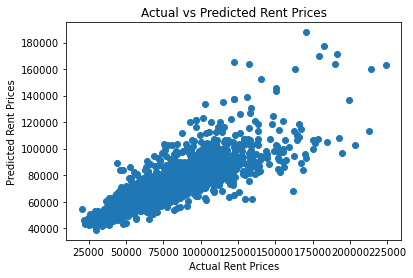

<Figure size 1600x2400 with 0 Axes>

In [70]:
y_predicted = mlmodel.predict(x_test)
y_predicted
plt.scatter(y_test, y_predicted)
plt.title('Actual vs Predicted Rent Prices')
plt.xlabel('Actual Rent Prices')
plt.ylabel('Predicted Rent Prices')
plt.figure(figsize=(20, 30), dpi=80)

In [71]:
scaler = StandardScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [72]:
pca = PCA(.95)
pca.fit(x_test)

x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

In [73]:
mlmodel = LinearRegression()

mlmodel.fit(x_train, y_train)

LinearRegression()

In [74]:
# Scores with PCA
print(mlmodel.score(x_train, y_train))
print(f'Train Score (Adj R Sq): {1 - (1-mlmodel.score(x_train, y_train))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)}')
print(mlmodel.score(x_test, y_test))
print(f'Test Score (Adj R Sq): {1 - (1-mlmodel.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)}')

0.6799568539430069
Train Score (Adj R Sq): 0.6794037839901435
0.7007757623186495
Test Score (Adj R Sq): 0.7002586697420112


<Figure size 1600x2400 with 0 Axes>

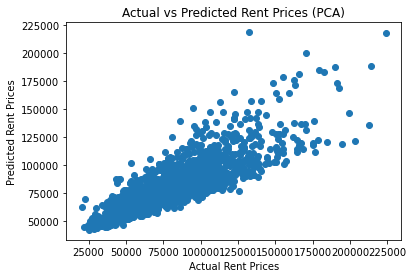

<Figure size 1600x2400 with 0 Axes>

In [75]:
y_predicted = mlmodel.predict(x_test)
y_predicted
plt.scatter(y_test, y_predicted)
plt.title('Actual vs Predicted Rent Prices (PCA)')
plt.xlabel('Actual Rent Prices')
plt.ylabel('Predicted Rent Prices')
plt.figure(figsize=(20, 30), dpi=80)

### Add Next Year's Rent Price as a Target

In [76]:
# For each zip code and year before 2019, get next year's rent price

# Check that each year has the same list of zip codes
# np.sum(zori_census_relevant_2014_19[zori_census_relevant_2014_19['year']==2019].sort_values('RegionName')[
#     'RegionName'].reset_index(drop=True) != zori_census_relevant_2014_19[zori_census_relevant_2014_19['year']==2015
#     ].sort_values('RegionName')['RegionName'].reset_index(drop=True))

first_yr = np.min(zori_census_relevant_1_2014_6_21['year'].unique())
last_yr = np.max(zori_census_relevant_1_2014_6_21['year'].unique())

next_yr_rent_2014_20_df = zori_census_relevant_1_2014_6_21[zori_census_relevant_1_2014_6_21['year']<last_yr].sort_values(
    ['year','RegionName'])[['RegionName','year']].reset_index(drop=True)
next_yr_rent_2014_20_df

,RegionName,year
0,01604,2014
1,01702,2014
2,01752,2014
3,01851,2014
4,01852,2014
...,...,...
12175,98466,2020
12176,98498,2020
12177,98661,2020
12178,98683,2020


In [77]:
next_yr_rent_2014_20_df['rent_next_yr'] = zori_census_relevant_1_2014_6_21[zori_census_relevant_1_2014_6_21['year'
            ]>first_yr].sort_values(['year','RegionName'])['rent_price'].reset_index(drop=True)

next_yr_rent_2014_20_df

# DO NOT Fabricate next yr data for 2021 (meaning 2022 rent prices)
# Does not make sense to predict on those
# Only do this for half yr values since we have the first half of 2021 rents

,RegionName,year,rent_next_yr
0,01604,2014,1119.416667
1,01702,2014,1655.354167
2,01752,2014,1408.750000
3,01851,2014,1135.416667
4,01852,2014,1283.875000
...,...,...,...
12175,98466,2020,1769.000000
12176,98498,2020,1563.500000
12177,98661,2020,1456.000000
12178,98683,2020,1522.666667


In [78]:
zori_census_relevant_2014_20 = zori_census_relevant_1_2014_6_21[zori_census_relevant_1_2014_6_21['year']<2021]
zori_census_relevant_2014_20_w_next_rent = zori_census_relevant_2014_20.merge(next_yr_rent_2014_20_df,how='left',on=['RegionName', 'year'])
zori_census_relevant_2014_20_w_next_rent

,RegionName,year,rent_price,median_income,income_per_capita,income_200000_or_more,owner_occupied_housing_units_median_value,median_rent,million_dollar_housing_units,rent_next_yr
0,01604,2014,1054.833333,47865.0,25798.00,375.0,211400.0,871.0,55,1119.416667
1,01604,2015,1119.416667,48212.0,25448.00,355.0,209600.0,873.0,55,1185.000000
2,01604,2016,1185.000000,50426.0,26263.00,378.0,209800.0,895.0,55,1247.500000
3,01604,2017,1247.500000,50487.0,26882.00,495.0,209700.0,915.0,39,1321.833333
4,01604,2018,1321.833333,53270.0,28104.00,533.0,219100.0,945.0,9,1404.083333
...,...,...,...,...,...,...,...,...,...,...
12175,99207,2016,1048.555556,33946.0,17390.00,27.0,109800.0,648.0,0,1121.250000
12176,99207,2017,1121.250000,35714.0,18521.00,38.0,109400.0,683.0,0,1174.500000
12177,99207,2018,1174.500000,38071.0,19362.00,61.0,116300.0,698.0,0,1268.333333
12178,99207,2019,1268.333333,41401.0,20136.94,0.4,128800.0,888.0,13,1335.458333


### PCA and MLR: Predict Next Year's Rent (Up to 2020)

In [82]:
x_train = zori_census_relevant_2014_20_w_next_rent[zori_census_relevant_2014_20_w_next_rent['year']<2020].iloc[:,3:9]
y_train = zori_census_relevant_2014_20_w_next_rent[zori_census_relevant_2014_20_w_next_rent['year']<2020].iloc[:,9]
x_test = zori_census_relevant_2014_20_w_next_rent[zori_census_relevant_2014_20_w_next_rent['year']==2020].iloc[:,3:9]
y_test = zori_census_relevant_2014_20_w_next_rent[zori_census_relevant_2014_20_w_next_rent['year']==2020].iloc[:,9]

In [83]:
mlmodel = LinearRegression()

mlmodel.fit(x_train, y_train)

LinearRegression()

In [84]:
# Regular Scores
print(mlmodel.score(x_train, y_train))
print(f'Train Score (Adj R Sq): {1 - (1-mlmodel.score(x_train, y_train))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)}')
print(mlmodel.score(x_test, y_test))
print(f'Test Score (Adj R Sq): {1 - (1-mlmodel.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)}')

0.7743914074645778
Train Score (Adj R Sq): 0.7736103044321412
0.6699582762715098
Test Score (Adj R Sq): 0.6688156044063218


<Figure size 1600x2400 with 0 Axes>

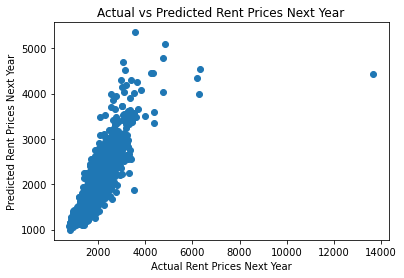

<Figure size 1600x2400 with 0 Axes>

In [85]:
y_predicted = mlmodel.predict(x_test)
y_predicted
plt.scatter(y_test, y_predicted)
plt.title('Actual vs Predicted Rent Prices Next Year')
plt.xlabel('Actual Rent Prices Next Year')
plt.ylabel('Predicted Rent Prices Next Year')
plt.figure(figsize=(20, 30), dpi=80)

In [86]:
scaler = StandardScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [87]:
pca = PCA(.95)
pca.fit(x_test)

x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

In [88]:
mlmodel = LinearRegression()

mlmodel.fit(x_train, y_train)

LinearRegression()

In [89]:
print(mlmodel.score(x_train, y_train))
print(f'Train Score (Adj R Sq): {1 - (1-mlmodel.score(x_train, y_train))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)}')
print(mlmodel.score(x_test, y_test))
print(f'Test Score (Adj R Sq): {1 - (1-mlmodel.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)}')

0.7732958469191061
Train Score (Adj R Sq): 0.7727731860474499
0.6618005016939554
Test Score (Adj R Sq): 0.6610207910350365


<Figure size 1600x2400 with 0 Axes>

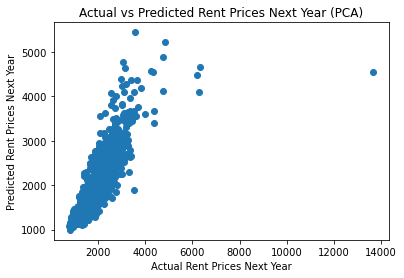

<Figure size 1600x2400 with 0 Axes>

In [90]:
y_predicted = mlmodel.predict(x_test)
y_predicted
plt.scatter(y_test, y_predicted)
plt.title('Actual vs Predicted Rent Prices Next Year (PCA)')
plt.xlabel('Actual Rent Prices Next Year')
plt.ylabel('Predicted Rent Prices Next Year')
plt.figure(figsize=(20, 30), dpi=80)

### Remake 2019 Census Data with More Columns

In [91]:
zori_census_2014_18[['RegionName','year','gini_index']]

,RegionName,year,gini_index
0,01604,2014,0.4390
1,01604,2015,0.4579
2,01604,2016,0.4569
3,01604,2017,0.4709
4,01604,2018,0.4672
...,...,...,...
8695,99207,2014,0.4195
8696,99207,2015,0.4117
8697,99207,2016,0.4161
8698,99207,2017,0.4144


In [92]:
# high_corr_w_rent = 
np.array(zori_census_2014_18.columns[7:])[[zori_census_2014_18[['rent_price']+list(zori_census_2014_18.columns[7:])].corr()['rent_price']>.2][0][1:]]

array(['asian_pop', 'asian_male_45_54', 'asian_male_55_64',
       'median_income', 'income_per_capita', 'income_125000_149999',
       'income_150000_199999', 'income_200000_or_more', 'gini_index',
       'renter_occupied_housing_units_paying_cash_median_gross_rent',
       'owner_occupied_housing_units_median_value',
       'dwellings_20_to_49_units', 'dwellings_50_or_more_units',
       'median_rent', 'rent_under_10_percent',
       'million_dollar_housing_units', 'walked_to_work', 'worked_at_home',
       'no_car', 'no_cars', 'commuters_by_public_transportation',
       'commuters_by_subway_or_elevated', 'bachelors_degree',
       'masters_degree', 'bachelors_degree_2',
       'bachelors_degree_or_higher_25_64', 'graduate_professional_degree',
       'male_45_64_graduate_degree',
       'employed_finance_insurance_real_estate', 'employed_information',
       'employed_science_management_admin_waste',
       'occupation_management_arts',
       'management_business_sci_arts_employed

In [93]:
# low_corr_w_rent = 
np.array(zori_census_2014_18.columns[7:])[[zori_census_2014_18[['rent_price']+list(zori_census_2014_18.columns[7:])].corr()['rent_price']<-.2][0][1:]]

array(['black_pop', 'black_male_45_54', 'income_15000_19999',
       'income_20000_24999', 'income_25000_29999', 'income_30000_34999',
       'income_35000_39999', 'income_40000_44999', 'income_45000_49999',
       'income_50000_59999', 'income_60000_74999', 'poverty',
       'vacant_housing_units_for_rent', 'vacant_housing_units_for_sale',
       'dwellings_1_units_detached',
       'households_public_asst_or_food_stamps',
       'children_in_single_female_hh',
       'one_parent_families_with_young_children',
       'father_one_parent_families_with_young_children',
       'father_in_labor_force_one_parent_families_with_young_children',
       'commuters_by_car_truck_van', 'commuters_by_carpool',
       'commuters_drove_alone', 'high_school_diploma',
       'less_one_year_college', 'one_year_more_college',
       'high_school_including_ged', 'some_college_and_associates_degree',
       'male_45_64_grade_9_12', 'male_45_64_high_school',
       'unemployed_pop', 'employed_construction',

In [97]:
raw_census_zipdata_2019 = pd.read_csv('./Raw_Census_Housing_Data2019.csv')

C:\Users\Nixon\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,3,4,6,7,10,11,22,23,24,26,27,30,31,34,35,38,39,42,43,46,47,50,51,54,55,58,59,62,63,64,66,67,70,71,74,75,78,79,82,83,86,87,90,91,94,95,98,99,102,103,106,107,108,110,111,114,115,118,119,122,123,126,127,130,131,134,135,138,139,142,143,150,151,152,154,155,158,159,162,163,166,167,170,171,174,175,178,179,180,182,183,186,187,198,199,200,202,203,206,207,210,211,214,215,218,219,222,223,226,227,228,230,231,234,235,238,239,242,243,246,247,248,250,251,254,255,258,259,262,263,266,267,270,271,274,275,278,279,282,283,286,287,288,290,291,294,295,298,299,302,303,304,306,307,310,311,314,315,318,319,320,322,323,326,327,330,331,334,335,338,339,342,343,346,347,350,351,358,359,360,362,363,366,367,370,371,372,374,375,378,379,382,383,386,387,390,391,394,395,398,399,406,407,408,410,411,414,415,418,419,422,423,426,427,430,431,438,439,440,442,443,446,447,450,451,454,455,458,459,462,463,466,467,468,470,471,4

In [98]:
raw_census_zipdata_2019

,GEO_ID,NAME,DP04_0001E,DP04_0001M,DP04_0001PE,DP04_0001PM,DP04_0002E,DP04_0002M,DP04_0002PE,DP04_0002PM,...,DP04_0141PE,DP04_0141PM,DP04_0142E,DP04_0142M,DP04_0142PE,DP04_0142PM,DP04_0143E,DP04_0143M,DP04_0143PE,DP04_0143PM
0,id,Geographic Area Name,Estimate!!HOUSING OCCUPANCY!!Total housing units,Margin of Error!!HOUSING OCCUPANCY!!Total hous...,Percent!!HOUSING OCCUPANCY!!Total housing units,Percent Margin of Error!!HOUSING OCCUPANCY!!To...,Estimate!!HOUSING OCCUPANCY!!Total housing uni...,Margin of Error!!HOUSING OCCUPANCY!!Total hous...,Percent!!HOUSING OCCUPANCY!!Total housing unit...,Percent Margin of Error!!HOUSING OCCUPANCY!!To...,...,Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHO...,Percent Margin of Error!!GROSS RENT AS A PERCE...,Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEH...,Margin of Error!!GROSS RENT AS A PERCENTAGE OF...,Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHO...,Percent Margin of Error!!GROSS RENT AS A PERCE...,Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEH...,Margin of Error!!GROSS RENT AS A PERCENTAGE OF...,Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHO...,Percent Margin of Error!!GROSS RENT AS A PERCE...
1,8600000US35004,ZCTA5 35004,4716,325,4716,(X),4624,325,98.0,2.2,...,19.5,12.8,211,114,26.4,13.4,91,94,(X),(X)
2,8600000US35005,ZCTA5 35005,3254,282,3254,(X),2697,242,82.9,3.9,...,5.6,6.0,221,101,40.1,14.3,89,56,(X),(X)
3,8600000US35006,ZCTA5 35006,1519,162,1519,(X),1018,117,67.0,6.3,...,0.0,40.7,22,24,41.5,40.9,46,46,(X),(X)
4,8600000US35007,ZCTA5 35007,9891,437,9891,(X),9292,431,93.9,2.0,...,3.6,3.0,465,171,29.0,9.3,51,40,(X),(X)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33116,8600000US00979,ZCTA5 00979,12267,566,12267,(X),8197,475,66.8,2.8,...,12.7,5.6,925,218,37.6,6.7,382,161,(X),(X)
33117,8600000US00982,ZCTA5 00982,7339,316,7339,(X),5910,268,80.5,2.6,...,9.3,4.5,529,166,41.8,9.7,649,165,(X),(X)
33118,8600000US00983,ZCTA5 00983,16325,584,16325,(X),13284,632,81.4,2.3,...,6.1,3.7,1017,249,34.5,7.0,1379,307,(X),(X)
33119,8600000US00985,ZCTA5 00985,14495,470,14495,(X),12166,418,83.9,2.1,...,10.4,4.1,950,226,35.1,7.1,918,222,(X),(X)


In [99]:
raw_census_zipdata_2019.columns = raw_census_zipdata_2019.iloc[0]

raw_census_zipdata_2019 = raw_census_zipdata_2019.iloc[1:,1:]

raw_census_zipdata_2019['Geographic Area Name'] = [zip_[6:] for zip_ in raw_census_zipdata_2019['Geographic Area Name']]

raw_census_zipdata_2019 = raw_census_zipdata_2019[[col_ for col_ in raw_census_zipdata_2019.columns if 'Margin' not in col_ and 'Percent' not in col_]]

raw_census_zipdata_2019 = raw_census_zipdata_2019.loc[:,~raw_census_zipdata_2019.columns.duplicated()]

In [100]:
[col_ for col_ in raw_census_zipdata_2019.columns]

['Geographic Area Name',
 'Estimate!!HOUSING OCCUPANCY!!Total housing units',
 'Estimate!!HOUSING OCCUPANCY!!Total housing units!!Occupied housing units',
 'Estimate!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units',
 'Estimate!!HOUSING OCCUPANCY!!Total housing units!!Homeowner vacancy rate',
 'Estimate!!HOUSING OCCUPANCY!!Total housing units!!Rental vacancy rate',
 'Estimate!!UNITS IN STRUCTURE!!Total housing units',
 'Estimate!!UNITS IN STRUCTURE!!Total housing units!!1-unit, detached',
 'Estimate!!UNITS IN STRUCTURE!!Total housing units!!1-unit, attached',
 'Estimate!!UNITS IN STRUCTURE!!Total housing units!!2 units',
 'Estimate!!UNITS IN STRUCTURE!!Total housing units!!3 or 4 units',
 'Estimate!!UNITS IN STRUCTURE!!Total housing units!!5 to 9 units',
 'Estimate!!UNITS IN STRUCTURE!!Total housing units!!10 to 19 units',
 'Estimate!!UNITS IN STRUCTURE!!Total housing units!!20 or more units',
 'Estimate!!UNITS IN STRUCTURE!!Total housing units!!Mobile home',
 'Estimate!!U

In [101]:
census_housing_2019 = raw_census_zipdata_2019[['Geographic Area Name',
                        'Estimate!!HOUSING OCCUPANCY!!Total housing units',
                        'Estimate!!HOUSING OCCUPANCY!!Total housing units!!Occupied housing units', 
                        'Estimate!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units',
                        'Estimate!!UNITS IN STRUCTURE!!Total housing units!!1-unit, detached',
                        'Estimate!!UNITS IN STRUCTURE!!Total housing units!!1-unit, attached',
                        'Estimate!!UNITS IN STRUCTURE!!Total housing units!!2 units',
                        'Estimate!!UNITS IN STRUCTURE!!Total housing units!!3 or 4 units',
                        'Estimate!!UNITS IN STRUCTURE!!Total housing units!!5 to 9 units',
                        'Estimate!!UNITS IN STRUCTURE!!Total housing units!!10 to 19 units',
                        'Estimate!!UNITS IN STRUCTURE!!Total housing units!!20 or more units',
                        'Estimate!!UNITS IN STRUCTURE!!Total housing units!!Mobile home',
                        'Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1939 or earlier',
                        'Estimate!!VALUE!!Owner-occupied units!!Median (dollars)',
                        'Estimate!!GROSS RENT!!Occupied units paying rent!!Median (dollars)',
                        'Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!Less than 15.0 percent',
                        'Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!15.0 to 19.9 percent',
                        'Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!20.0 to 24.9 percent',
                        'Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!25.0 to 29.9 percent',
                        'Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!30.0 to 34.9 percent',
                        'Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!35.0 percent or more',
                        'Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!Not computed',
                        'Estimate!!VALUE!!Owner-occupied units!!$1,000,000 or more']].rename(columns={
    'Geographic Area Name':'geo_id',
    'Estimate!!HOUSING OCCUPANCY!!Total housing units':'housing_units', 
    'Estimate!!HOUSING OCCUPANCY!!Total housing units!!Occupied housing units':'occupied_housing_units',
    'Estimate!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units':'vacant_housing_units',
    'Estimate!!UNITS IN STRUCTURE!!Total housing units!!1-unit, detached':'dwellings_1_units_detached',
    'Estimate!!UNITS IN STRUCTURE!!Total housing units!!1-unit, attached':'dwellings_1_units_attached',
    'Estimate!!UNITS IN STRUCTURE!!Total housing units!!2 units':'dwellings_2_units',
    'Estimate!!UNITS IN STRUCTURE!!Total housing units!!3 or 4 units':'dwellings_3_to_4_units',
    'Estimate!!UNITS IN STRUCTURE!!Total housing units!!5 to 9 units':'dwellings_5_to_9_units',
    'Estimate!!UNITS IN STRUCTURE!!Total housing units!!10 to 19 units':'dwellings_10_to_19_units',
    'Estimate!!UNITS IN STRUCTURE!!Total housing units!!20 or more units':'dwellings_20_or_more_units',
    # Combine columns 'dwellings_20_to_49_units', 'dwellings_50_or_more_units' to make 
    # 'dwellings_20_or_more_units' for 2014-2018
    'Estimate!!UNITS IN STRUCTURE!!Total housing units!!Mobile home':'mobile_homes',
    'Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1939 or earlier':'housing_built_1939_or_earlier',
    'Estimate!!VALUE!!Owner-occupied units!!Median (dollars)':'owner_occupied_housing_units_median_value',
    'Estimate!!GROSS RENT!!Occupied units paying rent!!Median (dollars)':'median_rent',
    'Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!Less than 15.0 percent':'rent_under_15_percent',
    # Combine columns 'rent_10_to_15_percent', 'rent_under_10_percent' to make 
    # 'rent_under_15_percent' for 2014-2018
    'Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!15.0 to 19.9 percent':'rent_15_to_20_percent',
    'Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!20.0 to 24.9 percent':'rent_20_to_25_percent',
    'Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!25.0 to 29.9 percent':'rent_25_to_30_percent',
    'Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!30.0 to 34.9 percent':'rent_30_to_35_percent',
    'Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!35.0 percent or more':'rent_over_35_percent',
    'Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!Not computed':'rent_burden_not_computed', 
    # Combine columns 'rent_35_to_40_percent', 'rent_40_to_50_percent', and 'rent_over_50_percent' to make 
    # 'rent_over_35_percent' for 2014-2018
    'Estimate!!VALUE!!Owner-occupied units!!$1,000,000 or more':'million_dollar_housing_units'
})

census_housing_2019

,geo_id,housing_units,occupied_housing_units,vacant_housing_units,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,...,owner_occupied_housing_units_median_value,median_rent,rent_under_15_percent,rent_15_to_20_percent,rent_20_to_25_percent,rent_25_to_30_percent,rent_30_to_35_percent,rent_over_35_percent,rent_burden_not_computed,million_dollar_housing_units
1,35004,4716,4624,92,3904,76,12,16,89,113,...,158900,886,115,116,73,129,156,211,91,0
2,35005,3254,2697,557,3018,8,8,33,0,14,...,97200,859,94,100,98,7,31,221,89,11
3,35006,1519,1018,501,1060,2,0,0,0,0,...,104300,788,21,8,2,0,0,22,46,0
4,35007,9891,9292,599,7990,414,54,117,330,210,...,168200,1036,203,390,263,223,58,465,51,49
5,35010,10202,7987,2215,7481,123,381,216,315,142,...,99900,659,292,262,106,273,147,797,441,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33116,00979,12267,8197,4070,2243,768,242,304,383,453,...,170600,870,241,390,216,374,311,925,382,21
33117,00982,7339,5910,1429,4006,1652,373,463,272,349,...,136800,604,119,128,203,170,118,529,649,11
33118,00983,16325,13284,3041,9170,3051,537,951,436,451,...,134700,551,350,562,499,340,181,1017,1379,13
33119,00985,14495,12166,2329,7446,3373,677,850,1137,455,...,131100,561,476,153,367,481,283,950,918,27


In [102]:
# Combine columns stated previously
zori_census_2014_18['dwellings_20_or_more_units'] = zori_census_2014_18['dwellings_20_to_49_units']+zori_census_2014_18[
        'dwellings_50_or_more_units']
zori_census_2014_18 = zori_census_2014_18.drop(columns=['dwellings_20_to_49_units','dwellings_50_or_more_units'])


zori_census_2014_18['rent_under_15_percent'] = zori_census_2014_18['rent_under_10_percent']+zori_census_2014_18[
        'rent_10_to_15_percent']
zori_census_2014_18 = zori_census_2014_18.drop(columns=['rent_under_10_percent','rent_10_to_15_percent'])


zori_census_2014_18['rent_over_35_percent'] = zori_census_2014_18['rent_35_to_40_percent']+zori_census_2014_18[
        'rent_40_to_50_percent']+zori_census_2014_18['rent_over_50_percent']
zori_census_2014_18 = zori_census_2014_18.drop(columns=['rent_35_to_40_percent',
        'rent_40_to_50_percent','rent_over_50_percent'])


In [103]:
raw_census_zipdata_2019 = pd.read_csv('./Raw_Census_Income_Data2019.csv')
raw_census_zipdata_2019

C:\Users\Nixon\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,3,34,35,66,67,98,99) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,GEO_ID,NAME,S1901_C01_001E,S1901_C01_001M,S1901_C01_002E,S1901_C01_002M,S1901_C01_003E,S1901_C01_003M,S1901_C01_004E,S1901_C01_004M,...,S1901_C04_012E,S1901_C04_012M,S1901_C04_013E,S1901_C04_013M,S1901_C04_014E,S1901_C04_014M,S1901_C04_015E,S1901_C04_015M,S1901_C04_016E,S1901_C04_016M
0,id,Geographic Area Name,Estimate!!Households!!Total,Margin of Error!!Households!!Total,"Estimate!!Households!!Total!!Less than $10,000",Margin of Error!!Households!!Total!!Less than ...,"Estimate!!Households!!Total!!$10,000 to $14,999","Margin of Error!!Households!!Total!!$10,000 to...","Estimate!!Households!!Total!!$15,000 to $24,999","Margin of Error!!Households!!Total!!$15,000 to...",...,Estimate!!Nonfamily households!!Median income ...,Margin of Error!!Nonfamily households!!Median ...,Estimate!!Nonfamily households!!Mean income (d...,Margin of Error!!Nonfamily households!!Mean in...,Estimate!!Nonfamily households!!PERCENT ALLOCA...,Margin of Error!!Nonfamily households!!PERCENT...,Estimate!!Nonfamily households!!PERCENT ALLOCA...,Margin of Error!!Nonfamily households!!PERCENT...,Estimate!!Nonfamily households!!PERCENT ALLOCA...,Margin of Error!!Nonfamily households!!PERCENT...
1,8600000US35004,ZCTA5 35004,4624,325,4.3,2.2,1.5,1.3,6.4,3.1,...,39716,6273,46240,7397,(X),(X),(X),(X),33.2,(X)
2,8600000US35005,ZCTA5 35005,2697,242,7.0,3.1,6.8,3.1,11.8,3.3,...,24233,3545,30659,4539,(X),(X),(X),(X),42.5,(X)
3,8600000US35006,ZCTA5 35006,1018,117,7.0,4.4,2.0,1.8,11.5,5.9,...,24340,9772,66897,60437,(X),(X),(X),(X),37.8,(X)
4,8600000US35007,ZCTA5 35007,9292,431,4.3,1.4,2.2,1.1,7.2,1.9,...,40685,5827,50534,5043,(X),(X),(X),(X),29.4,(X)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33116,8600000US00979,ZCTA5 00979,8197,475,9.0,2.1,5.7,1.9,18.9,3.3,...,27249,2446,45444,8406,(X),(X),(X),(X),37.2,(X)
33117,8600000US00982,ZCTA5 00982,5910,268,22.0,3.8,8.2,2.1,20.0,3.5,...,19152,3658,22151,2215,(X),(X),(X),(X),38.2,(X)
33118,8600000US00983,ZCTA5 00983,13284,632,19.9,2.5,10.3,2.1,18.8,2.6,...,18258,2685,22868,2498,(X),(X),(X),(X),29.2,(X)
33119,8600000US00985,ZCTA5 00985,12166,418,19.9,2.4,9.5,1.5,18.6,2.2,...,15090,1853,22909,4068,(X),(X),(X),(X),26.4,(X)


In [104]:
raw_census_zipdata_2019.columns = raw_census_zipdata_2019.iloc[0]

raw_census_zipdata_2019 = raw_census_zipdata_2019.iloc[1:,1:]

raw_census_zipdata_2019['Geographic Area Name'] = [zip_[6:] for zip_ in raw_census_zipdata_2019['Geographic Area Name']]

raw_census_zipdata_2019 = raw_census_zipdata_2019[[col_ for col_ in raw_census_zipdata_2019.columns if 'Margin' not in col_ and 'Percent' not in col_]]

raw_census_zipdata_2019 = raw_census_zipdata_2019.loc[:,~raw_census_zipdata_2019.columns.duplicated()]

In [105]:
[col_ for col_ in raw_census_zipdata_2019.columns]

['Geographic Area Name',
 'Estimate!!Households!!Total',
 'Estimate!!Households!!Total!!Less than $10,000',
 'Estimate!!Households!!Total!!$10,000 to $14,999',
 'Estimate!!Households!!Total!!$15,000 to $24,999',
 'Estimate!!Households!!Total!!$25,000 to $34,999',
 'Estimate!!Households!!Total!!$35,000 to $49,999',
 'Estimate!!Households!!Total!!$50,000 to $74,999',
 'Estimate!!Households!!Total!!$75,000 to $99,999',
 'Estimate!!Households!!Total!!$100,000 to $149,999',
 'Estimate!!Households!!Total!!$150,000 to $199,999',
 'Estimate!!Households!!Total!!$200,000 or more',
 'Estimate!!Households!!Median income (dollars)',
 'Estimate!!Households!!Mean income (dollars)',
 'Estimate!!Households!!PERCENT ALLOCATED!!Household income in the past 12 months',
 'Estimate!!Households!!PERCENT ALLOCATED!!Family income in the past 12 months',
 'Estimate!!Households!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months',
 'Estimate!!Families!!Total',
 'Estimate!!Families!!Total!!Less than $10,00

In [106]:
census_income_2019 = raw_census_zipdata_2019[['Geographic Area Name',
                        'Estimate!!Households!!Median income (dollars)',
                        'Estimate!!Households!!Total',
                        'Estimate!!Households!!Mean income (dollars)',
                        'Estimate!!Households!!Total!!Less than $10,000',
                        'Estimate!!Households!!Total!!$10,000 to $14,999',
                        'Estimate!!Households!!Total!!$15,000 to $24,999',
                        'Estimate!!Households!!Total!!$25,000 to $34,999',
                        'Estimate!!Households!!Total!!$35,000 to $49,999',
                        'Estimate!!Households!!Total!!$50,000 to $74,999',
                        'Estimate!!Households!!Total!!$75,000 to $99,999',
                        'Estimate!!Households!!Total!!$100,000 to $149,999',
                        'Estimate!!Households!!Total!!$150,000 to $199,999',
                        'Estimate!!Households!!Total!!$200,000 or more']].rename(columns={
    'Geographic Area Name':'geo_id',
    'Estimate!!Households!!Median income (dollars)':'median_income',
    'Estimate!!Households!!Total':'total_households',
    'Estimate!!Households!!Mean income (dollars)':'mean_income',
    'Estimate!!Households!!Total!!Less than $10,000':'income_less_10000',
    'Estimate!!Households!!Total!!$10,000 to $14,999':'income_10000_14999',
    'Estimate!!Households!!Total!!$15,000 to $24,999':'income_15000_24999',
    # combine 'income_15000_19999' and 'income_20000_24999' for 2014-2018
    'Estimate!!Households!!Total!!$25,000 to $34,999':'income_25000_34999',
    # combine 'income_25000_29999' and 'income_30000_34999' for 2014-2018
    'Estimate!!Households!!Total!!$35,000 to $49,999':'income_35000_49999',
    # combine 'income_35000_39999', 'income_40000_44999' and 'income_45000_49999' for 2014-2018
    'Estimate!!Households!!Total!!$50,000 to $74,999':'income_50000_74999',
    # combine 'income_50000_59999' and 'income_60000_74999' for 2014-2018
    'Estimate!!Households!!Total!!$75,000 to $99,999':'income_75000_99999',
    'Estimate!!Households!!Total!!$100,000 to $149,999':'income_100000_149999',
    # combine 'income_100000_124999' and 'income_125000_149999' for 2014-2018
    'Estimate!!Households!!Total!!$150,000 to $199,999':'income_150000_199999',
    'Estimate!!Households!!Total!!$200,000 or more':'income_200000_or_more'
})

census_income_2019

,geo_id,median_income,total_households,mean_income,income_less_10000,income_10000_14999,income_15000_24999,income_25000_34999,income_35000_49999,income_50000_74999,income_75000_99999,income_100000_149999,income_150000_199999,income_200000_or_more
1,35004,62902,4624,71145,4.3,1.5,6.4,11.1,14.0,24.2,11.4,20.4,5.3,1.3
2,35005,50473,2697,60551,7.0,6.8,11.8,10.9,13.1,20.8,11.1,15.1,2.5,1.0
3,35006,55909,1018,72128,7.0,2.0,11.5,10.2,15.1,17.3,12.2,19.1,5.0,0.7
4,35007,73587,9292,81551,4.3,2.2,7.2,5.0,12.6,20.0,17.0,23.9,5.1,2.7
5,35010,41954,7987,59677,8.8,7.6,13.7,12.0,13.2,18.9,10.1,9.4,3.2,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33116,00979,34701,8197,57878,9.0,5.7,18.9,16.8,11.7,17.0,8.1,7.8,1.2,3.9
33117,00982,24895,5910,30703,22.0,8.2,20.0,14.3,18.7,11.1,3.5,1.3,0.6,0.3
33118,00983,25750,13284,36008,19.9,10.3,18.8,13.9,14.3,14.7,3.8,2.7,0.8,0.7
33119,00985,26156,12166,33840,19.9,9.5,18.6,14.6,15.4,14.3,4.1,3.2,0.1,0.2


In [107]:
# Combine columns stated previously
zori_census_2014_18['income_15000_24999'] = zori_census_2014_18['income_15000_19999']+zori_census_2014_18[
        'income_20000_24999']
zori_census_2014_18 = zori_census_2014_18.drop(columns=['income_15000_19999','income_20000_24999'])


zori_census_2014_18['income_25000_34999'] = zori_census_2014_18['income_25000_29999']+zori_census_2014_18[
        'income_30000_34999']
zori_census_2014_18 = zori_census_2014_18.drop(columns=['income_25000_29999','income_30000_34999'])


zori_census_2014_18['income_35000_49999'] = zori_census_2014_18['income_35000_39999']+zori_census_2014_18[
        'income_40000_44999']+zori_census_2014_18['income_45000_49999']
zori_census_2014_18 = zori_census_2014_18.drop(columns=['income_35000_39999','income_40000_44999','income_45000_49999'])


zori_census_2014_18['income_50000_74999'] = zori_census_2014_18['income_50000_59999']+zori_census_2014_18[
        'income_60000_74999']
zori_census_2014_18 = zori_census_2014_18.drop(columns=['income_50000_59999',
        'income_60000_74999'])

zori_census_2014_18['income_100000_149999'] = zori_census_2014_18['income_100000_124999']+zori_census_2014_18[
        'income_125000_149999']
zori_census_2014_18 = zori_census_2014_18.drop(columns=['income_100000_124999',
        'income_125000_149999'])

In [108]:
raw_census_zipdata_2019 = pd.read_csv('./Raw_Census_Pop_Data2019.csv')
raw_census_zipdata_2019

C:\Users\Nixon\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,3,4,6,7,10,11,18,19,22,23,26,27,30,31,34,35,38,39,42,43,46,47,50,51,54,55,58,59,62,63,66,67,74,75,78,79,82,83,86,87,90,91,94,95,98,99,100,102,103,106,107,114,115,116,118,119,122,123,130,131,132,134,135,138,139,142,143,146,147,150,151,154,155,158,159,162,163,166,167,170,171,174,175,178,179,182,183,186,187,190,191,194,195,198,199,202,203,206,207,210,211,214,215,218,219,222,223,226,227,230,231,234,235,238,239,242,243,246,247,250,251,252,254,255,258,259,262,263,266,267,270,271,274,275,278,279,280,282,283,286,287,290,291,294,295,298,299,302,303,306,307,310,311,314,315,318,319,322,323,326,327,330,331,334,335,338,339,342,343,346,347,348,350,351,354,355) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,GEO_ID,NAME,DP05_0001E,DP05_0001M,DP05_0001PE,DP05_0001PM,DP05_0002E,DP05_0002M,DP05_0002PE,DP05_0002PM,...,DP05_0087PE,DP05_0087PM,DP05_0088E,DP05_0088M,DP05_0088PE,DP05_0088PM,DP05_0089E,DP05_0089M,DP05_0089PE,DP05_0089PM
0,id,Geographic Area Name,Estimate!!SEX AND AGE!!Total population,Margin of Error!!SEX AND AGE!!Total population,Percent!!SEX AND AGE!!Total population,Percent Margin of Error!!SEX AND AGE!!Total po...,Estimate!!SEX AND AGE!!Total population!!Male,Margin of Error!!SEX AND AGE!!Total population...,Percent!!SEX AND AGE!!Total population!!Male,Percent Margin of Error!!SEX AND AGE!!Total po...,...,"Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Estimate!!CITIZEN, VOTING AGE POPULATION!!Citi...","Margin of Error!!CITIZEN, VOTING AGE POPULATIO...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Estimate!!CITIZEN, VOTING AGE POPULATION!!Citi...","Margin of Error!!CITIZEN, VOTING AGE POPULATIO...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P..."
1,8600000US35004,ZCTA5 35004,12045,725,12045,(X),5840,477,48.5,2.5,...,8933,(X),4203,353,47.1,2.3,4730,357,52.9,2.3
2,8600000US35005,ZCTA5 35005,7344,579,7344,(X),3397,309,46.3,2.7,...,5534,(X),2471,220,44.7,2.9,3063,342,55.3,2.9
3,8600000US35006,ZCTA5 35006,2883,361,2883,(X),1498,228,52.0,3.0,...,2296,(X),1151,173,50.1,3.3,1145,154,49.9,3.3
4,8600000US35007,ZCTA5 35007,26332,1027,26332,(X),12827,607,48.7,1.5,...,18205,(X),8810,537,48.4,1.7,9395,474,51.6,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33116,8600000US00979,ZCTA5 00979,16130,1266,16130,(X),7713,767,47.8,2.3,...,13077,(X),6165,635,47.1,2.6,6912,601,52.9,2.6
33117,8600000US00982,ZCTA5 00982,14346,893,14346,(X),6419,569,44.7,2.2,...,11063,(X),4678,456,42.3,2.7,6385,500,57.7,2.7
33118,8600000US00983,ZCTA5 00983,33947,1735,33947,(X),15233,989,44.9,1.4,...,26005,(X),11520,787,44.3,1.6,14485,740,55.7,1.6
33119,8600000US00985,ZCTA5 00985,31682,1316,31682,(X),14312,815,45.2,1.4,...,25093,(X),10960,599,43.7,1.4,14133,622,56.3,1.4


In [109]:
raw_census_zipdata_2019.columns = raw_census_zipdata_2019.iloc[0]

raw_census_zipdata_2019 = raw_census_zipdata_2019.iloc[1:,1:]

raw_census_zipdata_2019['Geographic Area Name'] = [zip_[6:] for zip_ in raw_census_zipdata_2019['Geographic Area Name']]

raw_census_zipdata_2019 = raw_census_zipdata_2019[[col_ for col_ in raw_census_zipdata_2019.columns if 'Margin' not in col_ and 'Percent' not in col_]]

raw_census_zipdata_2019 = raw_census_zipdata_2019.loc[:,~raw_census_zipdata_2019.columns.duplicated()]

In [110]:
[col_ for col_ in zori_census_2014_18.columns[7:]]

['male_pop',
 'female_pop',
 'median_age',
 'male_under_5',
 'male_5_to_9',
 'male_10_to_14',
 'male_15_to_17',
 'male_18_to_19',
 'male_20',
 'male_21',
 'male_22_to_24',
 'male_25_to_29',
 'male_30_to_34',
 'male_35_to_39',
 'male_40_to_44',
 'male_45_to_49',
 'male_50_to_54',
 'male_55_to_59',
 'male_65_to_66',
 'male_67_to_69',
 'male_70_to_74',
 'male_75_to_79',
 'male_80_to_84',
 'male_85_and_over',
 'female_under_5',
 'female_5_to_9',
 'female_10_to_14',
 'female_15_to_17',
 'female_18_to_19',
 'female_20',
 'female_21',
 'female_22_to_24',
 'female_25_to_29',
 'female_30_to_34',
 'female_35_to_39',
 'female_40_to_44',
 'female_45_to_49',
 'female_50_to_54',
 'female_55_to_59',
 'female_60_to_61',
 'female_62_to_64',
 'female_65_to_66',
 'female_67_to_69',
 'female_70_to_74',
 'female_75_to_79',
 'female_80_to_84',
 'female_85_and_over',
 'white_pop',
 'population_1_year_and_over',
 'population_3_years_over',
 'pop_16_over',
 'pop_25_years_over',
 'pop_25_64',
 'not_us_citizen_p

In [111]:
[col_ for col_ in raw_census_zipdata_2019.columns]

['Geographic Area Name',
 'Estimate!!SEX AND AGE!!Total population',
 'Estimate!!SEX AND AGE!!Total population!!Male',
 'Estimate!!SEX AND AGE!!Total population!!Female',
 'Estimate!!SEX AND AGE!!Total population!!Sex ratio (males per 100 females)',
 'Estimate!!SEX AND AGE!!Total population!!Under 5 years',
 'Estimate!!SEX AND AGE!!Total population!!5 to 9 years',
 'Estimate!!SEX AND AGE!!Total population!!10 to 14 years',
 'Estimate!!SEX AND AGE!!Total population!!15 to 19 years',
 'Estimate!!SEX AND AGE!!Total population!!20 to 24 years',
 'Estimate!!SEX AND AGE!!Total population!!25 to 34 years',
 'Estimate!!SEX AND AGE!!Total population!!35 to 44 years',
 'Estimate!!SEX AND AGE!!Total population!!45 to 54 years',
 'Estimate!!SEX AND AGE!!Total population!!55 to 59 years',
 'Estimate!!SEX AND AGE!!Total population!!60 to 64 years',
 'Estimate!!SEX AND AGE!!Total population!!65 to 74 years',
 'Estimate!!SEX AND AGE!!Total population!!75 to 84 years',
 'Estimate!!SEX AND AGE!!Total po

In [112]:
raw_census_zipdata_2019[['Estimate!!RACE!!Total population!!Two or more races']]

,Estimate!!RACE!!Total population!!Two or more races
1,184
2,154
3,12
4,714
5,199
...,...
33116,1043
33117,1095
33118,2050
33119,2007


In [113]:
# pop_cols = ['asian_pop', 'asian_male_45_54', 'asian_male_55_64', 'black_pop', 'black_male_45_54']


census_pop_2019 = raw_census_zipdata_2019[['Geographic Area Name',
                            'Estimate!!SEX AND AGE!!Total population',
                            'Estimate!!SEX AND AGE!!Total population!!Male',
                            'Estimate!!SEX AND AGE!!Total population!!Female', 
                            'Estimate!!SEX AND AGE!!Total population!!16 years and over',
                            'Estimate!!RACE!!Total population!!One race!!White', 
                            'Estimate!!RACE!!Total population!!One race!!Black or African American',
                            'Estimate!!RACE!!Total population!!One race!!Asian',
                            'Estimate!!HISPANIC OR LATINO AND RACE!!Total population',
                            'Estimate!!RACE!!Total population!!One race!!American Indian and Alaska Native',
                            'Estimate!!RACE!!Total population!!One race!!Some other race',
                            'Estimate!!RACE!!Total population!!Two or more races',
                            'Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)',
                            'Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino'
                                          ]].rename(columns={
    'Geographic Area Name':'geo_id',
    'Estimate!!SEX AND AGE!!Total population':'total_pop',
    'Estimate!!SEX AND AGE!!Total population!!Male':'male_pop',
    'Estimate!!SEX AND AGE!!Total population!!Female':'female_pop',
    'Estimate!!SEX AND AGE!!Total population!!16 years and over':'pop_16_over',
    'Estimate!!RACE!!Total population!!One race!!White':'white_pop', 
    'Estimate!!RACE!!Total population!!One race!!Black or African American':'black_pop',
    'Estimate!!RACE!!Total population!!One race!!Asian':'asian_pop',
    'Estimate!!HISPANIC OR LATINO AND RACE!!Total population':'hispanic_pop',
    'Estimate!!RACE!!Total population!!One race!!American Indian and Alaska Native':'amerindian_pop',
    'Estimate!!RACE!!Total population!!One race!!Some other race':'other_race_pop',
    'Estimate!!RACE!!Total population!!Two or more races':'two_or_more_races_pop',
    'Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)':'hispanic_any_race',
    'Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino':'not_hispanic_pop'
})
census_pop_2019

,geo_id,total_pop,male_pop,female_pop,pop_16_over,white_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,two_or_more_races_pop,hispanic_any_race,not_hispanic_pop
1,35004,12045,5840,6205,9226,10381,1282,181,12045,0,17,184,115,11930
2,35005,7344,3397,3947,5784,4065,3045,0,7344,43,24,154,86,7258
3,35006,2883,1498,1385,2331,2789,73,0,2883,9,0,12,0,2883
4,35007,26332,12827,13505,20097,19080,3761,494,26332,241,2035,714,2976,23356
5,35010,20613,9790,10823,16590,13520,6361,114,20613,85,334,199,752,19861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33116,00979,16130,7713,8417,14491,11057,2162,234,16130,258,1376,1043,15182,948
33117,00982,14346,6419,7927,12006,8082,3143,76,14346,192,1758,1095,14224,122
33118,00983,33947,15233,18714,28239,17223,7720,16,33947,321,6617,2050,33618,329
33119,00985,31682,14312,17370,26670,16015,7572,46,31682,701,5341,2007,31592,90


In [114]:
census_relevant_2019 = census_housing_2019.merge(census_income_2019, how='left', on='geo_id').merge(census_pop_2019, how='left', on='geo_id')
census_relevant_2019['mean_income'] = census_relevant_2019['mean_income'].replace('-',np.nan).replace('N',np.nan).astype(float)
census_relevant_2019['total_households'] = census_relevant_2019['total_households'].astype(float)
census_relevant_2019['total_pop'] = census_relevant_2019['total_pop'].astype(float)

census_relevant_2019['income_per_capita'] = np.round((census_relevant_2019['mean_income']*census_relevant_2019['total_households']) / census_relevant_2019['total_pop'],2)
census_relevant_2019 = census_relevant_2019.drop(columns=['total_households','mean_income','total_pop'])
census_relevant_2019

,geo_id,housing_units,occupied_housing_units,vacant_housing_units,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,...,white_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,two_or_more_races_pop,hispanic_any_race,not_hispanic_pop,income_per_capita
0,35004,4716,4624,92,3904,76,12,16,89,113,...,10381,1282,181,12045,0,17,184,115,11930,27312.12
1,35005,3254,2697,557,3018,8,8,33,0,14,...,4065,3045,0,7344,43,24,154,86,7258,22236.66
2,35006,1519,1018,501,1060,2,0,0,0,0,...,2789,73,0,2883,9,0,12,0,2883,25468.71
3,35007,9891,9292,599,7990,414,54,117,330,210,...,19080,3761,494,26332,241,2035,714,2976,23356,28777.60
4,35010,10202,7987,2215,7481,123,381,216,315,142,...,13520,6361,114,20613,85,334,199,752,19861,23123.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33115,00979,12267,8197,4070,2243,768,242,304,383,453,...,11057,2162,234,16130,258,1376,1043,15182,948,29412.65
33116,00982,7339,5910,1429,4006,1652,373,463,272,349,...,8082,3143,76,14346,192,1758,1095,14224,122,12648.45
33117,00983,16325,13284,3041,9170,3051,537,951,436,451,...,17223,7720,16,33947,321,6617,2050,33618,329,14090.50
33118,00985,14495,12166,2329,7446,3373,677,850,1137,455,...,16015,7572,46,31682,701,5341,2007,31592,90,12994.68


In [133]:
# Convert strings to null values and floats
for col in list(census_relevant_2019.columns)[1:47]:
    census_relevant_2019[col] = census_relevant_2019[col].replace('-',np.nan).replace('2,000,000+',2000001.0).replace(
        '10,000-',9999.0).replace('3,500+',3501.0).replace('2,500-',2499.0).replace('250,000+',250001.0).astype(float)

census_relevant_2019['year']=2019
census_relevant_2019 = census_relevant_2019[['geo_id','year']+list(census_relevant_2019.columns[1:47])]

In [134]:
for col in list(census_relevant_2019.columns):
    print(type(census_relevant_2019[col][0]))

<class 'str'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<cla

In [135]:
census_relevant_2020_fabricated = census_relevant_2019.copy()
census_relevant_2020_fabricated['year'] = 2020

census_relevant_2021_fabricated = census_relevant_2019.copy()
census_relevant_2021_fabricated['year'] = 2021

In [137]:
census_relevant_2014_21 = pd.concat((zori_census_2014_18[census_relevant_2019.columns], census_relevant_2019, census_relevant_2020_fabricated, census_relevant_2021_fabricated)).reset_index(drop=True)

In [161]:
zori_census_1_2014_6_21 = zori_1_2014_6_21.merge(census_relevant_2014_21, how='inner', 
                    left_on=['RegionName', 'year'], right_on=['geo_id', 'year']).drop('geo_id',1)

zori_census_1_2014_6_21.shape

(13920, 49)

In [162]:
zori_census_1_2014_6_21

,RegionName,year,rent_price,housing_units,occupied_housing_units,vacant_housing_units,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,...,white_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,two_or_more_races_pop,hispanic_any_race,not_hispanic_pop,income_per_capita
0,01604,2014,1054.833333,15417.0,14057.0,1360.0,4737.0,1269.0,1780.0,3970.0,...,21834.0,4206.0,2613.0,5206.0,102.0,46.0,611.0,5206.0,29422.0,25798.00
1,01604,2015,1119.416667,15438.0,14130.0,1308.0,4706.0,1307.0,1888.0,3979.0,...,21240.0,4815.0,2354.0,6279.0,113.0,10.0,618.0,6279.0,29162.0,25448.00
2,01604,2016,1185.000000,15657.0,14189.0,1468.0,4695.0,1228.0,1818.0,4322.0,...,20034.0,5553.0,2976.0,6479.0,152.0,10.0,652.0,6479.0,29387.0,26263.00
3,01604,2017,1247.500000,16048.0,14447.0,1601.0,4891.0,1396.0,1770.0,4362.0,...,20086.0,5127.0,3095.0,7370.0,302.0,43.0,737.0,7370.0,29402.0,26882.00
4,01604,2018,1321.833333,16187.0,14575.0,1612.0,4826.0,1326.0,1865.0,4503.0,...,20264.0,4887.0,3344.0,7761.0,336.0,87.0,789.0,7761.0,29707.0,28104.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13915,99207,2017,1121.250000,13622.0,12083.0,1539.0,9862.0,416.0,1104.0,538.0,...,23436.0,617.0,879.0,2220.0,764.0,21.0,1940.0,2220.0,27821.0,18521.00
13916,99207,2018,1174.500000,13475.0,12030.0,1445.0,9822.0,259.0,1184.0,641.0,...,23035.0,772.0,886.0,2222.0,750.0,18.0,1857.0,2222.0,27486.0,19362.00
13917,99207,2019,1268.333333,13434.0,12204.0,1230.0,9786.0,326.0,964.0,675.0,...,23967.0,1293.0,1074.0,30411.0,763.0,767.0,2470.0,2297.0,28114.0,20136.94
13918,99207,2020,1335.458333,13434.0,12204.0,1230.0,9786.0,326.0,964.0,675.0,...,23967.0,1293.0,1074.0,30411.0,763.0,767.0,2470.0,2297.0,28114.0,20136.94


### Create Biannual Covid-19 Data

In [225]:
cleaned_covid = pd.read_csv('./cleaned_covid.csv')

cleaned_covid = cleaned_covid.iloc[:,1:].sort_values(['zip','yr_mo'])
cleaned_covid['zip'] = [str_ if len(str_)==5 else '0'+str_ if len(str_)==4 else '00'+str_ 
     for str_ in cleaned_covid['zip'].astype(str)]

cleaned_covid['year'] = cleaned_covid['yr_mo'].str[:4].astype(int)
cleaned_covid['month'] = cleaned_covid['yr_mo'].str[5:].astype(int)

# np.sum([len(str_)<5 for str_ in zori_1_2014_6_21['RegionName'].astype(str)])

cleaned_covid = cleaned_covid.drop(columns='yr_mo')

cleaned_covid = cleaned_covid[['zip','year','month']+list(cleaned_covid.columns[1:(len(cleaned_covid.columns)-2)])]

cleaned_covid

,zip,year,month,zip_cases_to_ttl,zip_new_cases_to_ttl,zip_deaths_to_ttl,zip_new_deaths_to_ttl
5535,00602,2020,1,0.000000,0.000000,0.000000,0.000000
5545,00602,2020,2,0.000000,0.000000,0.000000,0.000000
5555,00602,2020,3,0.000424,0.000424,0.000000,0.000000
5565,00602,2020,4,0.002013,0.001589,0.000132,0.000132
5575,00602,2020,5,0.002887,0.000848,0.000159,0.000000
...,...,...,...,...,...,...,...
492917,99403,2021,2,0.057153,0.002489,0.001220,0.000049
492920,99403,2021,3,0.059349,0.002147,0.001220,0.000000
492923,99403,2021,4,0.061984,0.002636,0.001269,0.000000
492926,99403,2021,5,0.065938,0.003905,0.001220,0.000000


In [232]:
cleaned_covid_first_half = cleaned_covid[cleaned_covid['month']<=6]
cleaned_covid_second_half = cleaned_covid[cleaned_covid['month']>6]

cleaned_covid_second_half['year'] = cleaned_covid_second_half['year']+0.5

<ipython-input-232-bd72db8919f6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_covid_second_half['year'] = cleaned_covid_second_half['year']+0.5


In [238]:
cleaned_covid_biann = pd.concat((cleaned_covid_first_half.groupby(['zip','year']).agg('mean').drop('month',axis=1), 
           cleaned_covid_second_half.groupby(['zip','year']).agg('mean').drop('month',axis=1))).sort_values(['zip','year'])
cleaned_covid_biann

zip_cases_to_ttl  zip_new_cases_to_ttl  zip_deaths_to_ttl  \
zip   year                                                                
00602 2020.0          0.001925              0.001033           0.000079   
      2020.5          0.032922              0.007859           0.000287   
      2021.0          0.079839              0.005179           0.000817   
00693 2020.0          0.000603              0.000247           0.000034   
      2020.5          0.015177              0.007349           0.000337   
...                        ...                   ...                ...   
99402 2020.5          0.015597              0.006541           0.000126   
      2021.0          0.060629              0.003648           0.000755   
99403 2020.0          0.000423              0.000138           0.000024   
      2020.5          0.015813              0.006939           0.000285   
      2021.0          0.061008              0.004018           0.001220   

              zip_new_deaths_to_ttl  
zip   year                           
00602 2020.0               0.000022  
      2020.5               0.000018  
      2021.0               0.000071  
00693 2020.0               0.000012  
      2020.5               0.000144  
...                             ...  
99402 2020.5               0.000000  
      2021.0               0.000000  
99403 2020.0               0.000008  
      2020.5               0.000098  
      2021.0               0.000065  

[88323 rows x 4 columns]

### Create Biannual Zori-Census Data

In [163]:
zori_census_half_yr = zori_census_1_2014_6_21[['RegionName','year']]
zori_census_half_yr['year'] = zori_census_half_yr['year']+0.5

zori_census_1_2014_6_21_biann = zori_census_1_2014_6_21.merge(zori_census_half_yr, 
                how='outer', on=['RegionName', 'year']).sort_values(['RegionName','year']).reset_index(drop=True)
zori_census_1_2014_6_21_biann

<ipython-input-163-83ad1310727a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zori_census_half_yr['year'] = zori_census_half_yr['year']+0.5
C:\Users\Nixon\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1123: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(


,RegionName,year,rent_price,housing_units,occupied_housing_units,vacant_housing_units,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,...,white_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,two_or_more_races_pop,hispanic_any_race,not_hispanic_pop,income_per_capita
0,01604,2014.0,1054.833333,15417.0,14057.0,1360.0,4737.0,1269.0,1780.0,3970.0,...,21834.0,4206.0,2613.0,5206.0,102.0,46.0,611.0,5206.0,29422.0,25798.00
1,01604,2014.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01604,2015.0,1119.416667,15438.0,14130.0,1308.0,4706.0,1307.0,1888.0,3979.0,...,21240.0,4815.0,2354.0,6279.0,113.0,10.0,618.0,6279.0,29162.0,25448.00
3,01604,2015.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01604,2016.0,1185.000000,15657.0,14189.0,1468.0,4695.0,1228.0,1818.0,4322.0,...,20034.0,5553.0,2976.0,6479.0,152.0,10.0,652.0,6479.0,29387.0,26263.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27835,99207,2019.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27836,99207,2020.0,1335.458333,13434.0,12204.0,1230.0,9786.0,326.0,964.0,675.0,...,23967.0,1293.0,1074.0,30411.0,763.0,767.0,2470.0,2297.0,28114.0,20136.94
27837,99207,2020.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27838,99207,2021.0,1405.333333,13434.0,12204.0,1230.0,9786.0,326.0,964.0,675.0,...,23967.0,1293.0,1074.0,30411.0,763.0,767.0,2470.0,2297.0,28114.0,20136.94


In [168]:
for zip_ in zori_census_1_2014_6_21_biann['RegionName'].unique():
    zori_census_1_2014_6_21_biann[zori_census_1_2014_6_21_biann['RegionName']==zip_] = zori_census_1_2014_6_21_biann[
        zori_census_1_2014_6_21_biann['RegionName']==zip_].interpolate()

In [201]:
zori_census_1_2014_6_21_biann = zori_census_1_2014_6_21_biann[zori_census_1_2014_6_21_biann['year']<2021.5]
zori_census_1_2014_6_21_biann

,RegionName,year,rent_price,housing_units,occupied_housing_units,vacant_housing_units,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,...,white_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,two_or_more_races_pop,hispanic_any_race,not_hispanic_pop,income_per_capita
0,01604,2014.0,1054.833333,15417.0,14057.0,1360.0,4737.0,1269.0,1780.0,3970.0,...,21834.0,4206.0,2613.0,5206.0,102.0,46.0,611.0,5206.0,29422.0,25798.00
1,01604,2014.5,1087.125000,15427.5,14093.5,1334.0,4721.5,1288.0,1834.0,3974.5,...,21537.0,4510.5,2483.5,5742.5,107.5,28.0,614.5,5742.5,29292.0,25623.00
2,01604,2015.0,1119.416667,15438.0,14130.0,1308.0,4706.0,1307.0,1888.0,3979.0,...,21240.0,4815.0,2354.0,6279.0,113.0,10.0,618.0,6279.0,29162.0,25448.00
3,01604,2015.5,1152.208333,15547.5,14159.5,1388.0,4700.5,1267.5,1853.0,4150.5,...,20637.0,5184.0,2665.0,6379.0,132.5,10.0,635.0,6379.0,29274.5,25855.50
4,01604,2016.0,1185.000000,15657.0,14189.0,1468.0,4695.0,1228.0,1818.0,4322.0,...,20034.0,5553.0,2976.0,6479.0,152.0,10.0,652.0,6479.0,29387.0,26263.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27834,99207,2019.0,1268.333333,13434.0,12204.0,1230.0,9786.0,326.0,964.0,675.0,...,23967.0,1293.0,1074.0,30411.0,763.0,767.0,2470.0,2297.0,28114.0,20136.94
27835,99207,2019.5,1301.895833,13434.0,12204.0,1230.0,9786.0,326.0,964.0,675.0,...,23967.0,1293.0,1074.0,30411.0,763.0,767.0,2470.0,2297.0,28114.0,20136.94
27836,99207,2020.0,1335.458333,13434.0,12204.0,1230.0,9786.0,326.0,964.0,675.0,...,23967.0,1293.0,1074.0,30411.0,763.0,767.0,2470.0,2297.0,28114.0,20136.94
27837,99207,2020.5,1370.395833,13434.0,12204.0,1230.0,9786.0,326.0,964.0,675.0,...,23967.0,1293.0,1074.0,30411.0,763.0,767.0,2470.0,2297.0,28114.0,20136.94


In [196]:
np.sum(zori_census_1_2014_6_21_biann.isna())

RegionName                                   0
year                                         0
rent_price                                   0
housing_units                                0
occupied_housing_units                       0
vacant_housing_units                         0
dwellings_1_units_detached                   0
dwellings_1_units_attached                   0
dwellings_2_units                            0
dwellings_3_to_4_units                       0
dwellings_5_to_9_units                       0
dwellings_10_to_19_units                     0
dwellings_20_or_more_units                   0
mobile_homes                                 0
housing_built_1939_or_earlier                0
owner_occupied_housing_units_median_value    0
median_rent                                  0
rent_under_15_percent                        0
rent_15_to_20_percent                        0
rent_20_to_25_percent                        0
rent_25_to_30_percent                        0
rent_30_to_35

### Combine with Covid-19 Data

In [240]:
# np.sum(cleaned_covid_biann.isna())
cleaned_covid_biann

zip_cases_to_ttl  zip_new_cases_to_ttl  zip_deaths_to_ttl  \
zip   year                                                                
00602 2020.0          0.001925              0.001033           0.000079   
      2020.5          0.032922              0.007859           0.000287   
      2021.0          0.079839              0.005179           0.000817   
00693 2020.0          0.000603              0.000247           0.000034   
      2020.5          0.015177              0.007349           0.000337   
...                        ...                   ...                ...   
99402 2020.5          0.015597              0.006541           0.000126   
      2021.0          0.060629              0.003648           0.000755   
99403 2020.0          0.000423              0.000138           0.000024   
      2020.5          0.015813              0.006939           0.000285   
      2021.0          0.061008              0.004018           0.001220   

              zip_new_deaths_to_ttl  
zip   year                           
00602 2020.0               0.000022  
      2020.5               0.000018  
      2021.0               0.000071  
00693 2020.0               0.000012  
      2020.5               0.000144  
...                             ...  
99402 2020.5               0.000000  
      2021.0               0.000000  
99403 2020.0               0.000008  
      2020.5               0.000098  
      2021.0               0.000065  

[88323 rows x 4 columns]

In [246]:
zori_census_covid_biann = zori_census_1_2014_6_21_biann.merge(cleaned_covid_biann,how='left',
                                    left_on=['RegionName', 'year'],right_on=['zip','year']).fillna(0)
zori_census_covid_biann

,RegionName,year,rent_price,housing_units,occupied_housing_units,vacant_housing_units,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,...,amerindian_pop,other_race_pop,two_or_more_races_pop,hispanic_any_race,not_hispanic_pop,income_per_capita,zip_cases_to_ttl,zip_new_cases_to_ttl,zip_deaths_to_ttl,zip_new_deaths_to_ttl
0,01604,2014.0,1054.833333,15417.0,14057.0,1360.0,4737.0,1269.0,1780.0,3970.0,...,102.0,46.0,611.0,5206.0,29422.0,25798.00,0.000000,0.000000,0.000000,0.000000
1,01604,2014.5,1087.125000,15427.5,14093.5,1334.0,4721.5,1288.0,1834.0,3974.5,...,107.5,28.0,614.5,5742.5,29292.0,25623.00,0.000000,0.000000,0.000000,0.000000
2,01604,2015.0,1119.416667,15438.0,14130.0,1308.0,4706.0,1307.0,1888.0,3979.0,...,113.0,10.0,618.0,6279.0,29162.0,25448.00,0.000000,0.000000,0.000000,0.000000
3,01604,2015.5,1152.208333,15547.5,14159.5,1388.0,4700.5,1267.5,1853.0,4150.5,...,132.5,10.0,635.0,6379.0,29274.5,25855.50,0.000000,0.000000,0.000000,0.000000
4,01604,2016.0,1185.000000,15657.0,14189.0,1468.0,4695.0,1228.0,1818.0,4322.0,...,152.0,10.0,652.0,6479.0,29387.0,26263.00,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26095,99207,2019.0,1268.333333,13434.0,12204.0,1230.0,9786.0,326.0,964.0,675.0,...,763.0,767.0,2470.0,2297.0,28114.0,20136.94,0.000000,0.000000,0.000000,0.000000
26096,99207,2019.5,1301.895833,13434.0,12204.0,1230.0,9786.0,326.0,964.0,675.0,...,763.0,767.0,2470.0,2297.0,28114.0,20136.94,0.000000,0.000000,0.000000,0.000000
26097,99207,2020.0,1335.458333,13434.0,12204.0,1230.0,9786.0,326.0,964.0,675.0,...,763.0,767.0,2470.0,2297.0,28114.0,20136.94,0.000817,0.000455,0.000027,0.000005
26098,99207,2020.5,1370.395833,13434.0,12204.0,1230.0,9786.0,326.0,964.0,675.0,...,763.0,767.0,2470.0,2297.0,28114.0,20136.94,0.022936,0.008034,0.000367,0.000093


### Add Next Year's Rent Price as a Target

In [248]:
first_biann = np.min(zori_census_covid_biann['year'].unique())
last_biann = np.max(zori_census_covid_biann['year'].unique())

next_biann_rent = zori_census_covid_biann[zori_census_covid_biann['year']<last_biann].sort_values(
    ['year','RegionName'])[['RegionName','year']].reset_index(drop=True)
next_biann_rent

,RegionName,year
0,01604,2014.0
1,01702,2014.0
2,01752,2014.0
3,01851,2014.0
4,01852,2014.0
...,...,...
24355,98466,2020.5
24356,98498,2020.5
24357,98661,2020.5
24358,98683,2020.5


In [254]:
next_biann_rent['rent_next_biann'] = zori_census_covid_biann[zori_census_covid_biann['year'
            ]>first_biann].sort_values(['year','RegionName'])['rent_price'
            ].reset_index(drop=True)

next_biann_rent.sort_values(['RegionName','year'])

,RegionName,year,rent_next_biann
0,01604,2014.0,1087.125000
1740,01604,2014.5,1119.416667
3480,01604,2015.0,1152.208333
5220,01604,2015.5,1185.000000
6960,01604,2016.0,1216.250000
...,...,...,...
17399,99207,2018.5,1268.333333
19139,99207,2019.0,1301.895833
20879,99207,2019.5,1335.458333
22619,99207,2020.0,1370.395833


In [276]:
zori_census_covid_biann_w_next = zori_census_covid_biann.merge(next_biann_rent,how='left',on=['RegionName', 'year'])
zori_census_covid_biann_w_next = zori_census_covid_biann_w_next[list(zori_census_covid_biann_w_next.columns)[:3]+
                            [zori_census_covid_biann_w_next.columns[len(zori_census_covid_biann_w_next.columns)-1]]+
                            list(zori_census_covid_biann_w_next.columns[3:len(zori_census_covid_biann_w_next.columns)-1])]
zori_census_covid_biann_w_next

,RegionName,year,rent_price,rent_next_biann,housing_units,occupied_housing_units,vacant_housing_units,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,...,amerindian_pop,other_race_pop,two_or_more_races_pop,hispanic_any_race,not_hispanic_pop,income_per_capita,zip_cases_to_ttl,zip_new_cases_to_ttl,zip_deaths_to_ttl,zip_new_deaths_to_ttl
0,01604,2014.0,1054.833333,1087.125000,15417.0,14057.0,1360.0,4737.0,1269.0,1780.0,...,102.0,46.0,611.0,5206.0,29422.0,25798.00,0.000000,0.000000,0.000000,0.000000
1,01604,2014.5,1087.125000,1119.416667,15427.5,14093.5,1334.0,4721.5,1288.0,1834.0,...,107.5,28.0,614.5,5742.5,29292.0,25623.00,0.000000,0.000000,0.000000,0.000000
2,01604,2015.0,1119.416667,1152.208333,15438.0,14130.0,1308.0,4706.0,1307.0,1888.0,...,113.0,10.0,618.0,6279.0,29162.0,25448.00,0.000000,0.000000,0.000000,0.000000
3,01604,2015.5,1152.208333,1185.000000,15547.5,14159.5,1388.0,4700.5,1267.5,1853.0,...,132.5,10.0,635.0,6379.0,29274.5,25855.50,0.000000,0.000000,0.000000,0.000000
4,01604,2016.0,1185.000000,1216.250000,15657.0,14189.0,1468.0,4695.0,1228.0,1818.0,...,152.0,10.0,652.0,6479.0,29387.0,26263.00,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26095,99207,2019.0,1268.333333,1301.895833,13434.0,12204.0,1230.0,9786.0,326.0,964.0,...,763.0,767.0,2470.0,2297.0,28114.0,20136.94,0.000000,0.000000,0.000000,0.000000
26096,99207,2019.5,1301.895833,1335.458333,13434.0,12204.0,1230.0,9786.0,326.0,964.0,...,763.0,767.0,2470.0,2297.0,28114.0,20136.94,0.000000,0.000000,0.000000,0.000000
26097,99207,2020.0,1335.458333,1370.395833,13434.0,12204.0,1230.0,9786.0,326.0,964.0,...,763.0,767.0,2470.0,2297.0,28114.0,20136.94,0.000817,0.000455,0.000027,0.000005
26098,99207,2020.5,1370.395833,1405.333333,13434.0,12204.0,1230.0,9786.0,326.0,964.0,...,763.0,767.0,2470.0,2297.0,28114.0,20136.94,0.022936,0.008034,0.000367,0.000093


In [277]:
zori_census_covid_biann_w_next.to_csv('./zori_census_covid_biann')